In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scripts.gestion_donnees.pretraitement import Pretraitement
from scripts.evaluation.evaluation_model import Evaluation
from scripts.classifieurs.forets_aleatoires import Forets_aleatoires
from scripts.classifieurs.reseaux_de_neurones import Reseaux_de_neurones
from scripts.classifieurs.arbre_de_decision import Arbre_de_decision
from scripts.classifieurs.svm import SVM_Classificateur
from scripts.classifieurs.adaboost import AdaBoost_model
from scripts.classifieurs.bagging import Bagging
from scripts.classifieurs.knn import Knn 
from scripts.classifieurs.logistic_regression import LogisticRegression_model
from scripts.classifieurs.perceptron import Perceptron_model
from sklearn.ensemble import RandomForestClassifier

## Partie 1 :  Prétraitement et analyse des données

In [2]:
# creation des instances
Ev = Evaluation
Pt = Pretraitement("./data/train.csv")
#  charger donneés entrainement
df_train_init = Pt.Charger_donnees()
# encoder donneés
etiquette,classes = Pt.Encoder_donnees(df_train_init,"species")
df_train_init = df_train_init.drop(['id','species'], axis=1)
# supprimer les valeurs aberrantes
outliers = Pt.Indice_outliers(df_train_init,3.0)
df_train = df_train_init.drop(outliers)
etiquette = [etiquette[i] for i in range(len(etiquette)) if i not in outliers]
# diviser les donnees
x_train, x_test, y_train, y_test, x_val, y_val = Pt.Diviser_donnees(df_train,etiquette)

In [3]:
#vérifie la redondance des datas
print("Le nombre de données redondantes de train est " + str(df_train.duplicated().sum()))
#vérifie si pour un des attributs il manque une valeur
print("Nb valeur manquante train " + str(df_train.isnull().any().sum()))
#
unique_elements = set(etiquette)

# Get the count of unique elements
n_classes = len(unique_elements)
print(n_classes)


Le nombre de données redondantes de train est 0
Nb valeur manquante train 0
99


## Partie 2 : Modélisation et évaluation des données

##### Forets aléatoires

In [4]:
model_foret_alea = Forets_aleatoires(x_train, y_train, x_val, y_val,x_test,y_test)
model_foret_alea.validation_croisee_gridsearch()
model_foret_alea.entrainement()
predictions = model_foret_alea.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.9705, Precision: 0.9825, Recall: 0.9689


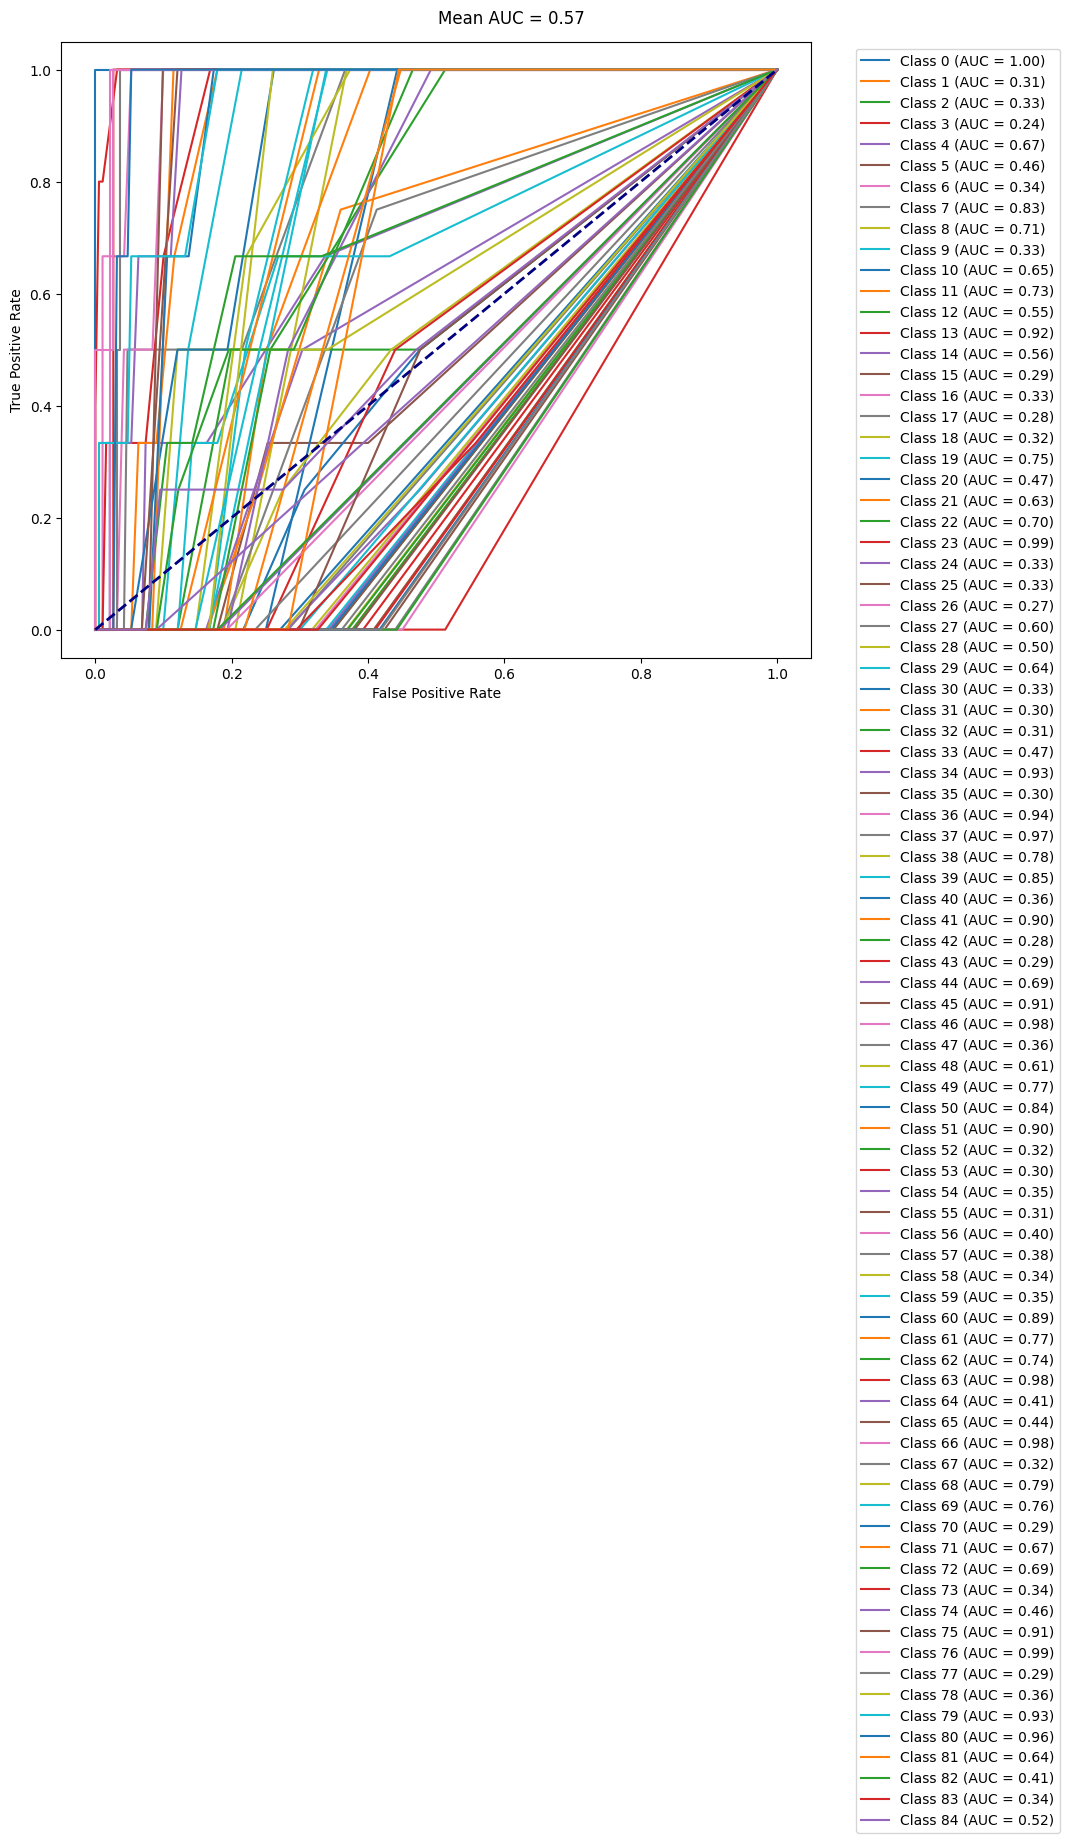

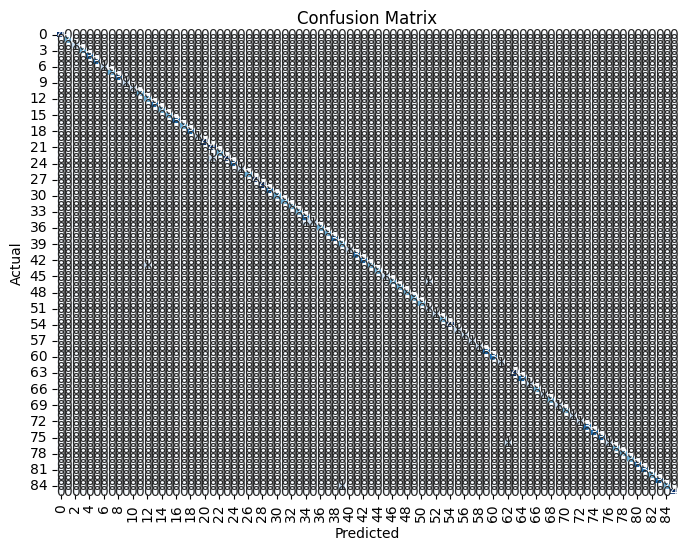

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         

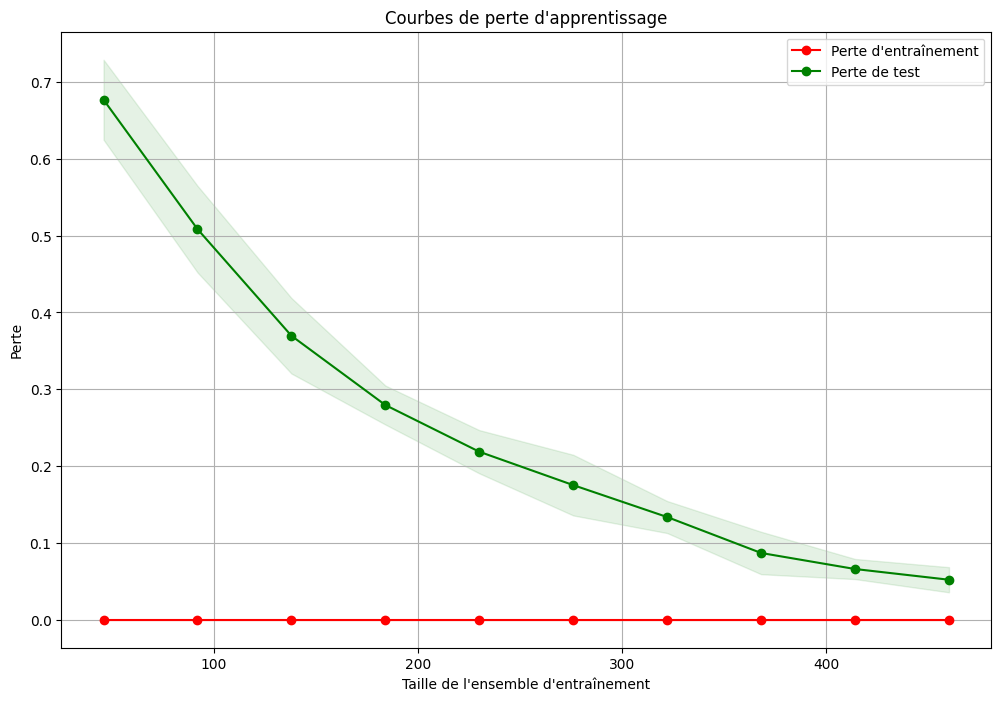

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


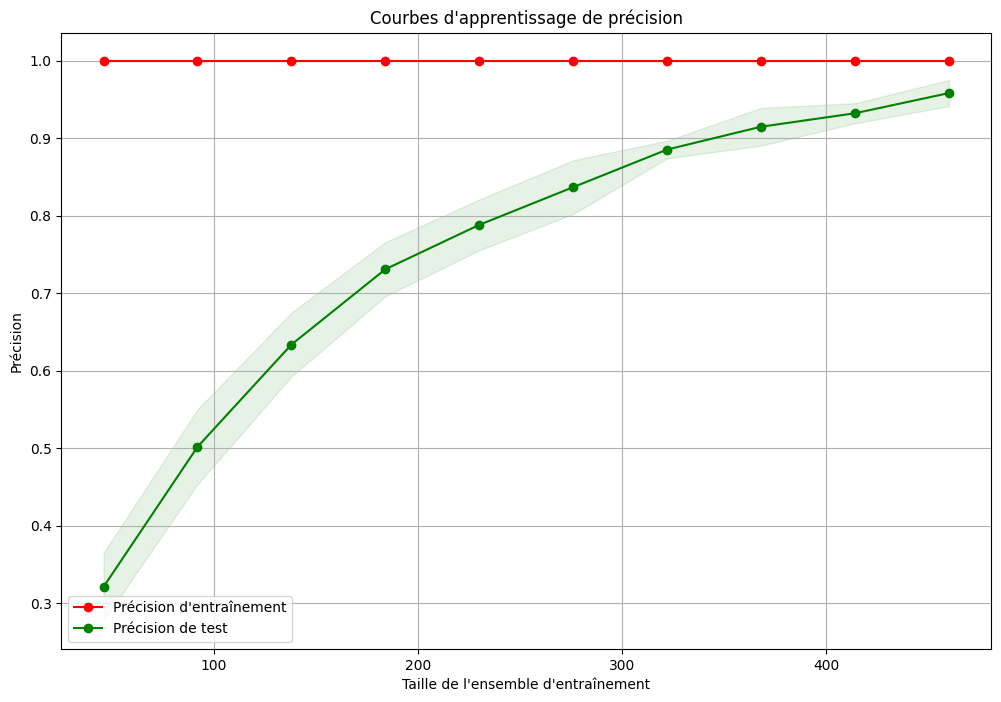

In [5]:
evaluation_fa= Evaluation(model=model_foret_alea.rf_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation_fa.calculate_metrics(model_foret_alea.y_test, model_foret_alea.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_fa.plt_roc_curve()
evaluation_fa.plt_confusion_matrix()
evaluation_fa.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_fa.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_fa.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### SVM

In [6]:
svm_model = SVM_Classificateur(x_train, y_train, x_val, y_val, x_test, y_test)
svm_model.validation_croisee_gridsearch()
svm_model.entrainement()
predictions_svm = svm_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7194, Precision: 0.7891, Recall: 0.7254


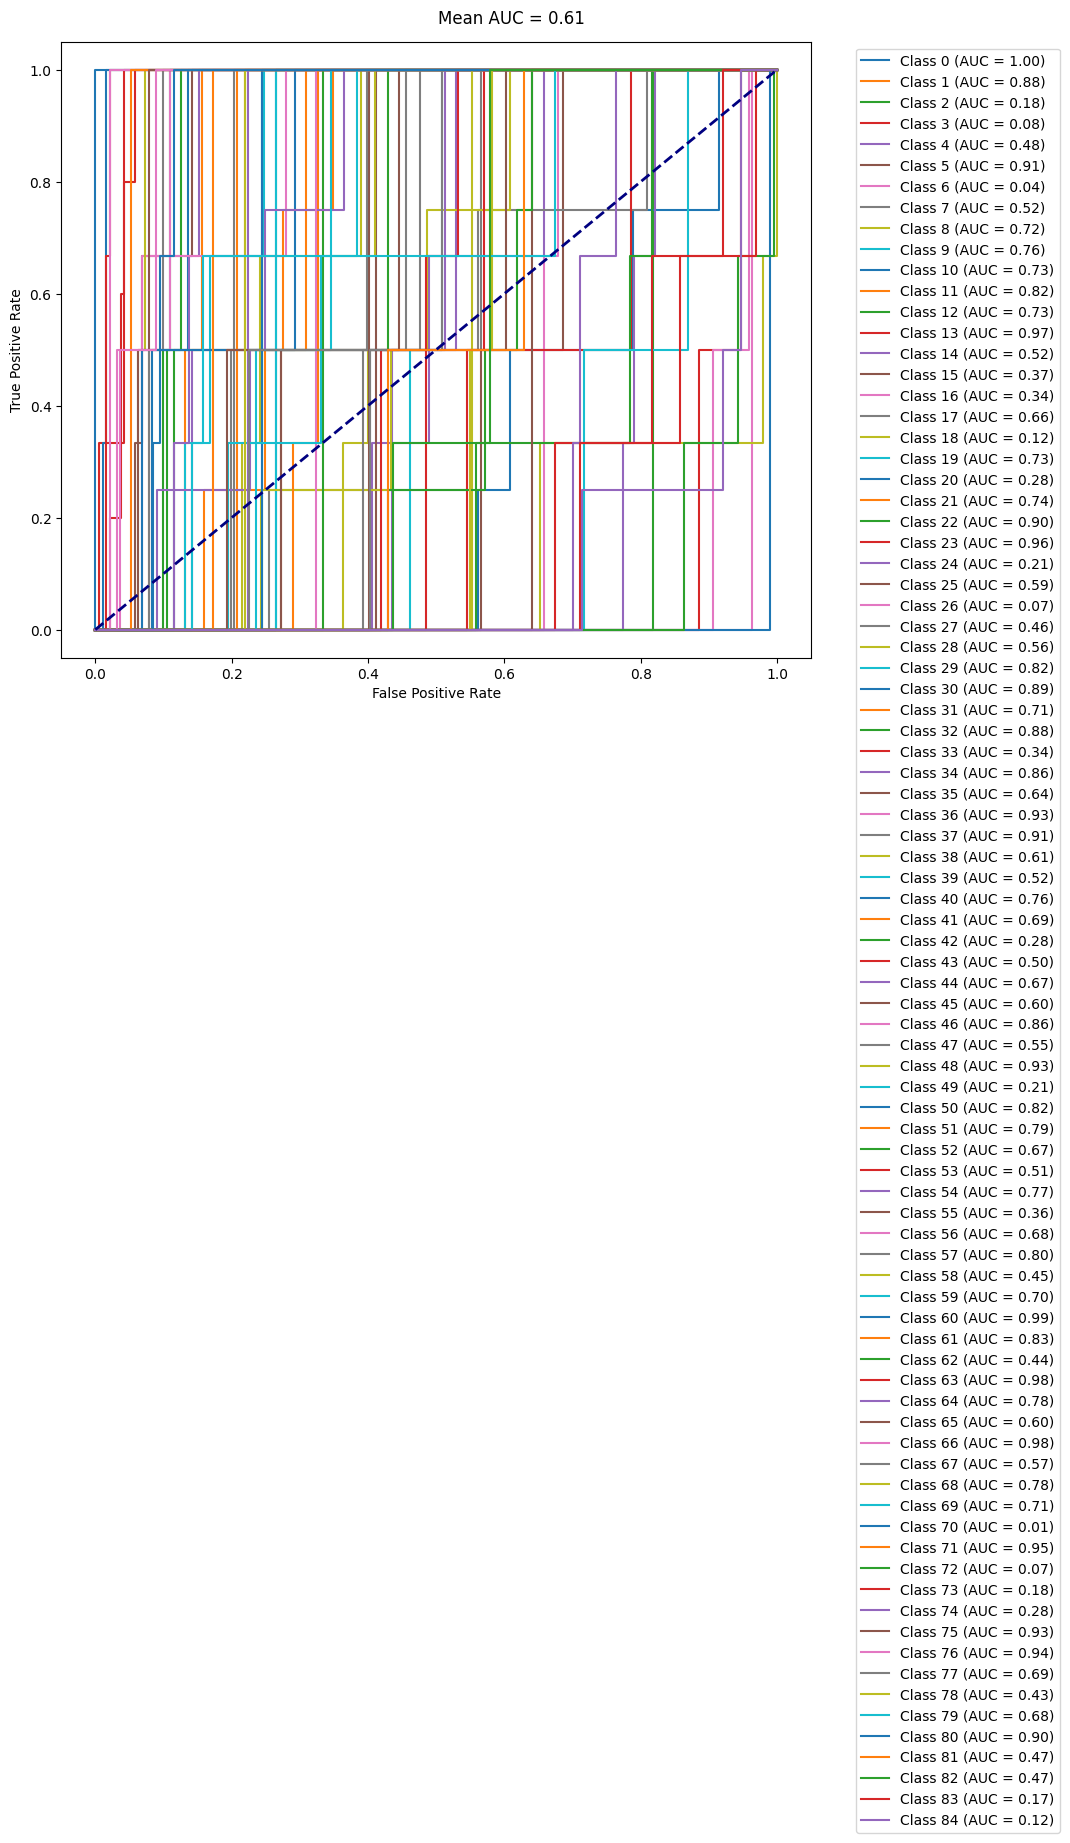

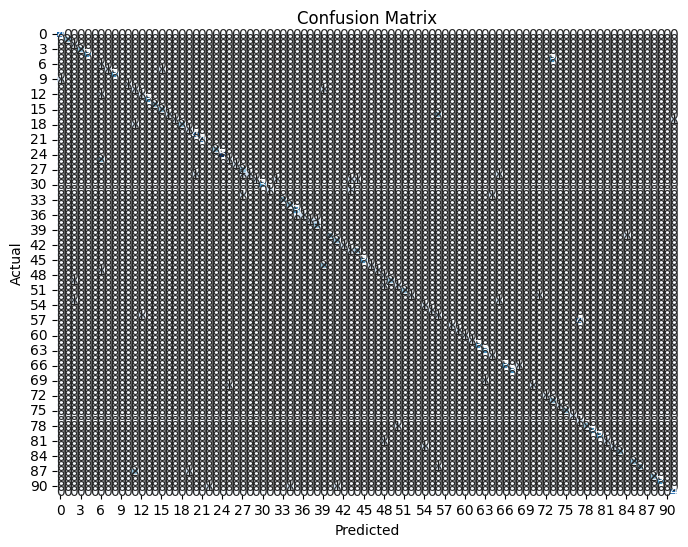

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         3
           7       0.20      1.00      0.33         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.25      0.50      0.33         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      0.33      0.50         

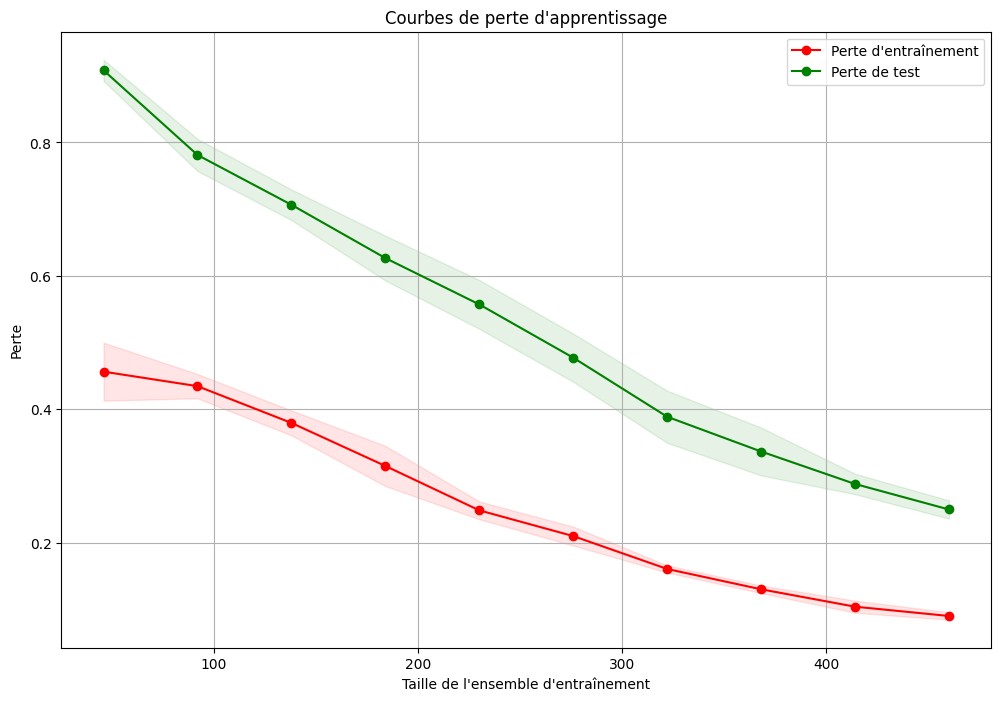

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


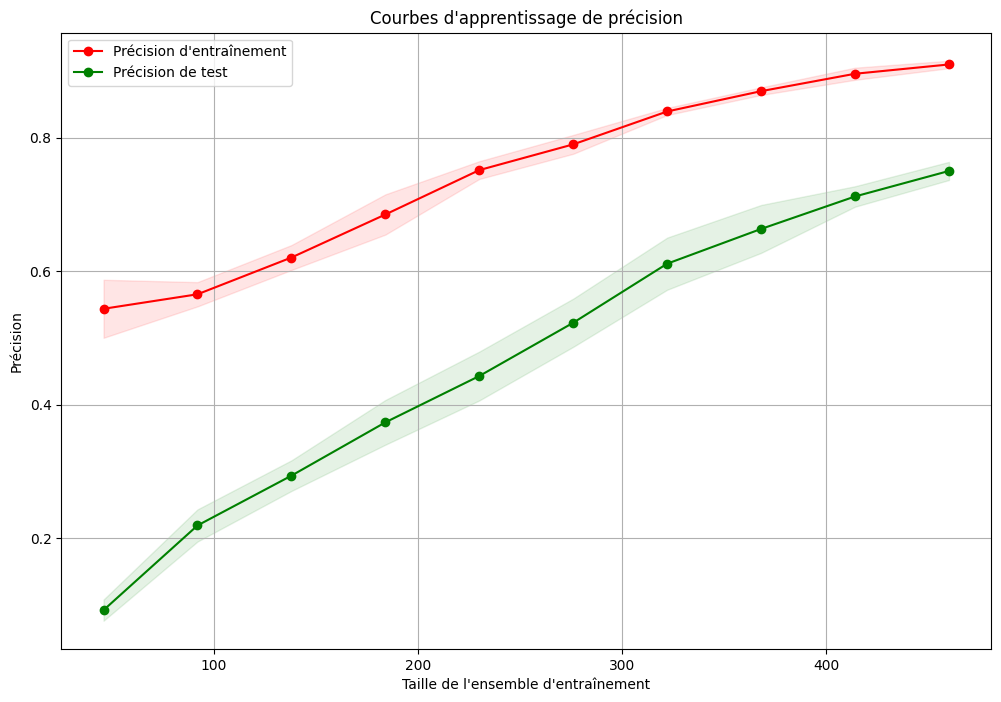

In [7]:
evaluation_svm = Evaluation(svm_model.svm_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_svm.calculate_metrics(evaluation_svm.y_test, predictions_svm)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_svm.plt_roc_curve()
evaluation_svm.plt_confusion_matrix()
evaluation_svm.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_svm.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_svm.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Arbre de decision

In [8]:
Arbre_de_decision_model = Arbre_de_decision(x_train, y_train, x_val, y_val, x_test, y_test)
Arbre_de_decision_model.validation_croisee_gridsearch()
Arbre_de_decision_model.entrainement()
predictions = Arbre_de_decision_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


F1 Score: 0.5067, Precision: 0.5983, Recall: 0.5181


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


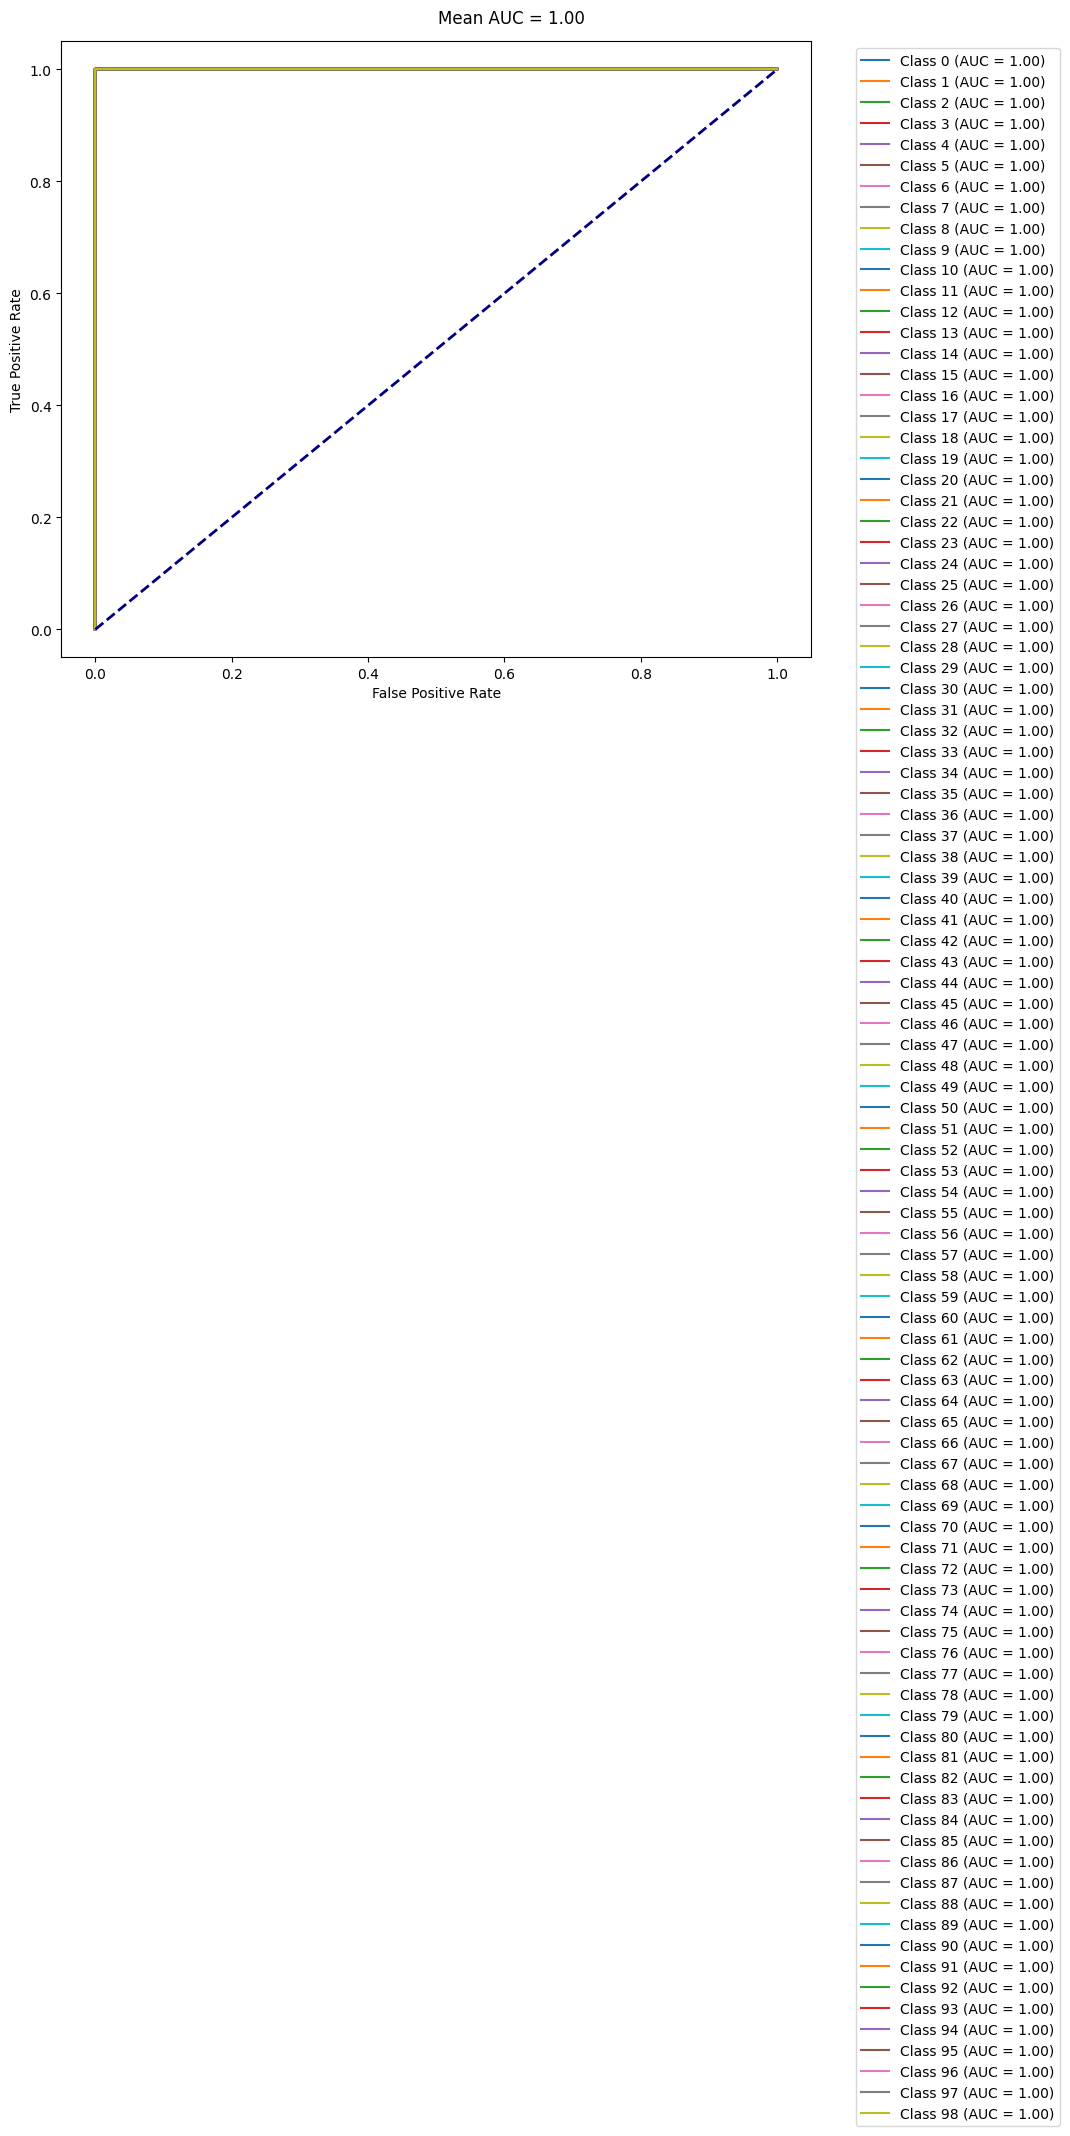

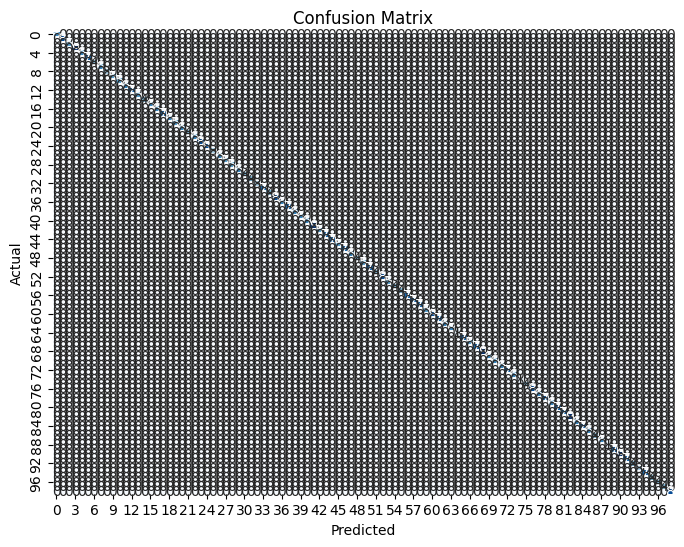

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


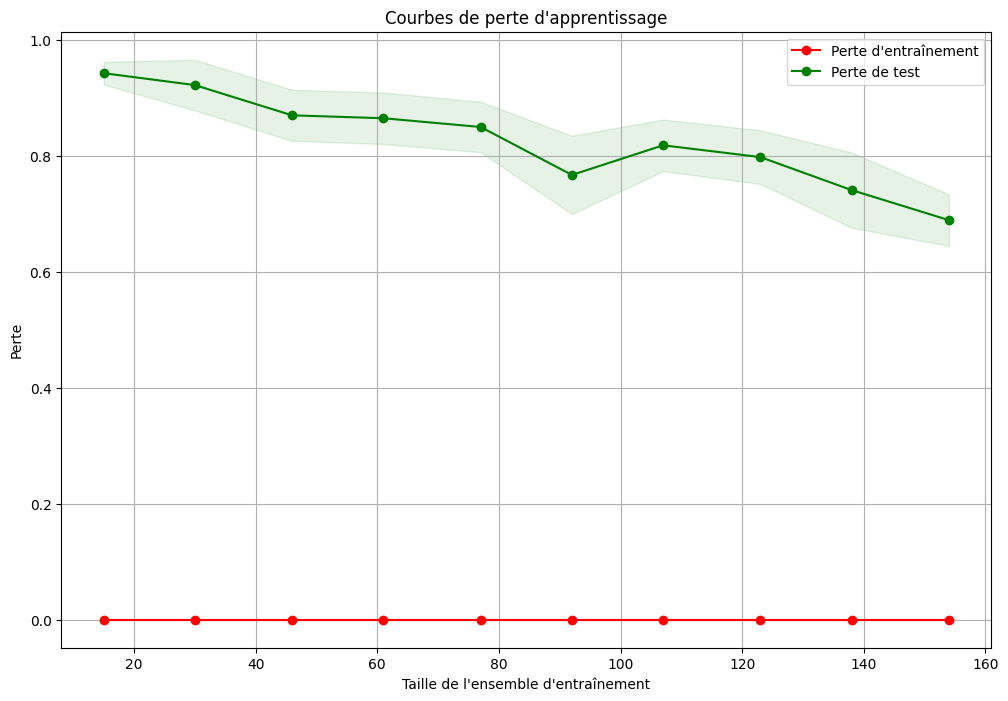

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


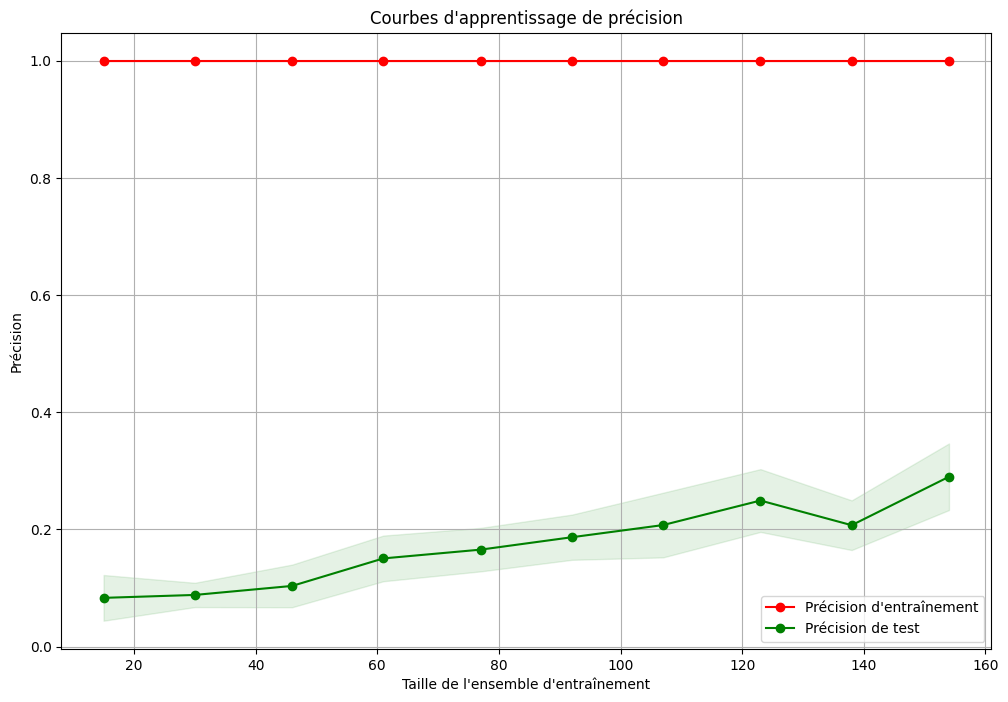

In [9]:
evaluation_dt = Evaluation(Arbre_de_decision_model.dt_classifier, Arbre_de_decision_model.x_test, Arbre_de_decision_model.y_test,Arbre_de_decision_model.x_train,Arbre_de_decision_model.y_train)
f1, precision, recall = evaluation_dt.calculate_metrics(Arbre_de_decision_model.y_test, Arbre_de_decision_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_dt.plt_roc_curve()
evaluation_dt.plt_confusion_matrix()
evaluation_dt.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_dt.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Ada boosting


In [10]:
adaboost_model = AdaBoost_model(x_train, y_train, x_val, y_val, x_test, y_test)
adaboost_model.validation_croisee_gridsearch()
adaboost_model.entrainement()
predictions = adaboost_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=6), 'learning_rate': 0.01, 'n_estimators': 50}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=6), 'learning_rate': 0.01, 'n_estimators': 50}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.3935, Precision: 0.4190, Recall: 0.4301


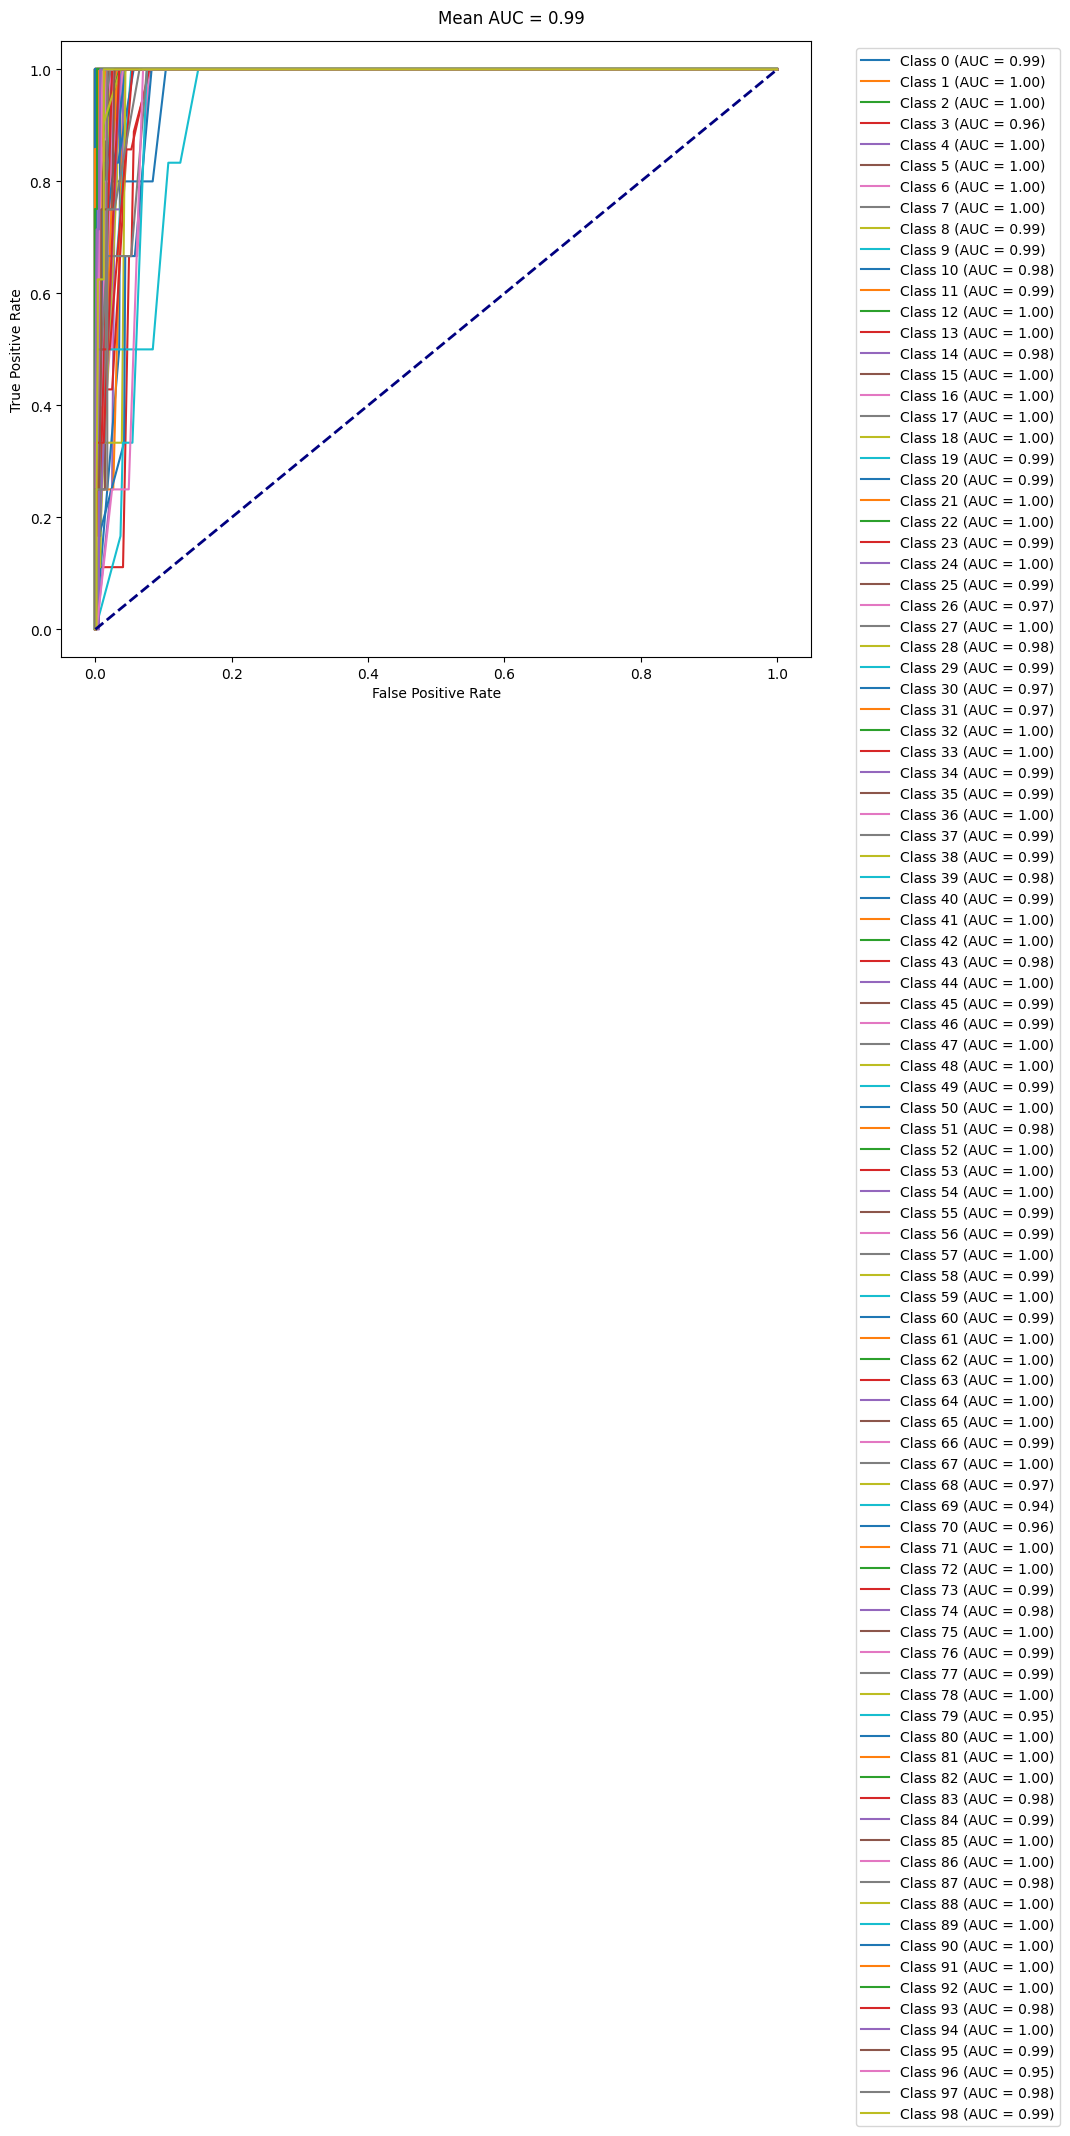

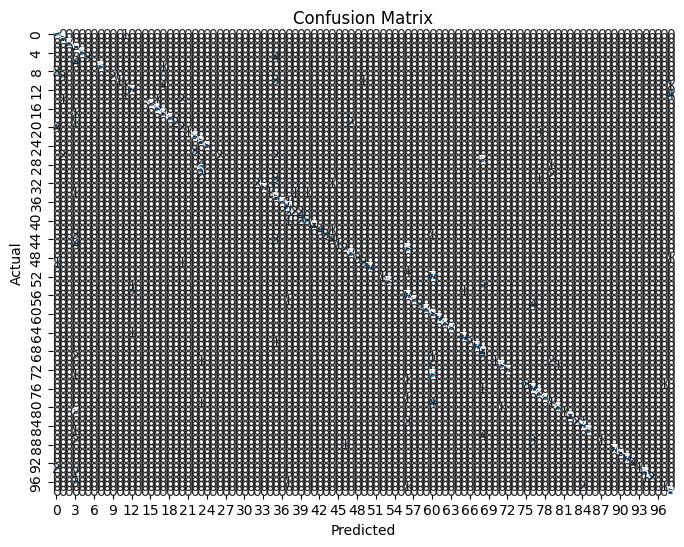

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Rapport de classification :
               precision    recall  f1-score   support

           0       0.33      0.83      0.48         6
           1       0.57      1.00      0.73         8
           2       1.00      1.00      1.00         5
           3       0.22      1.00      0.36         9
           4       1.00      1.00      1.00         6
           5       1.00      0.43      0.60         7
           6       0.00      0.00      0.00         4
           7       1.00      0.83      0.91         6
           8       0.00      0.00      0.00         3
           9       1.00      0.40      0.57         5
          10       1.00      0.20      0.33         5
          11       0.33      0.17      0.22         6
          12       0.58      1.00      0.74         7
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00         6
          16       0.86      1.00      0.92         

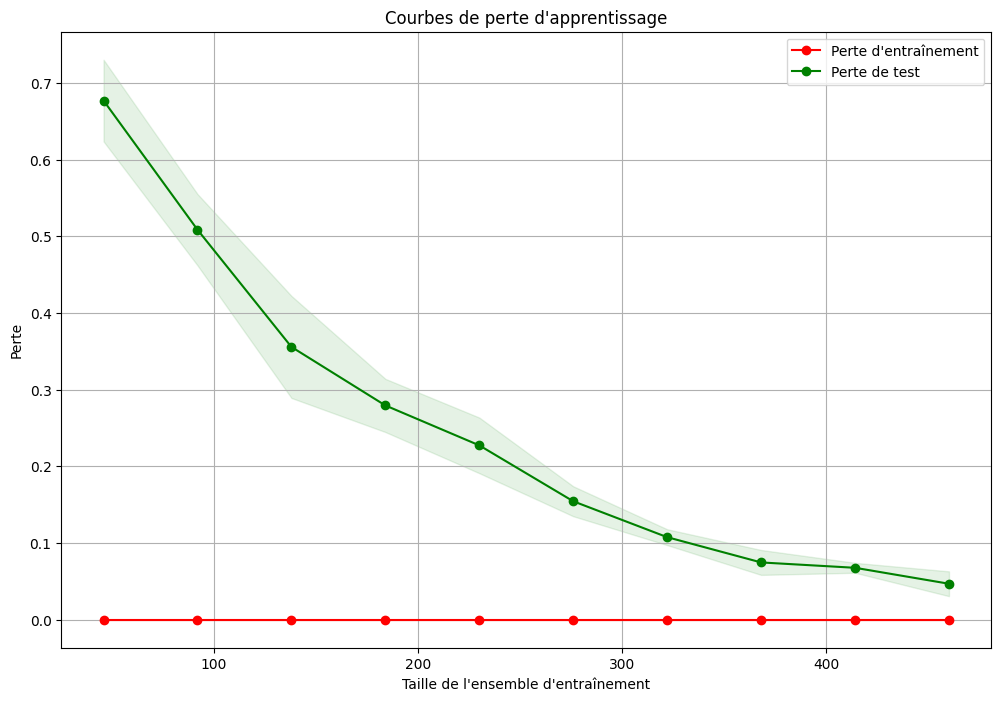

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


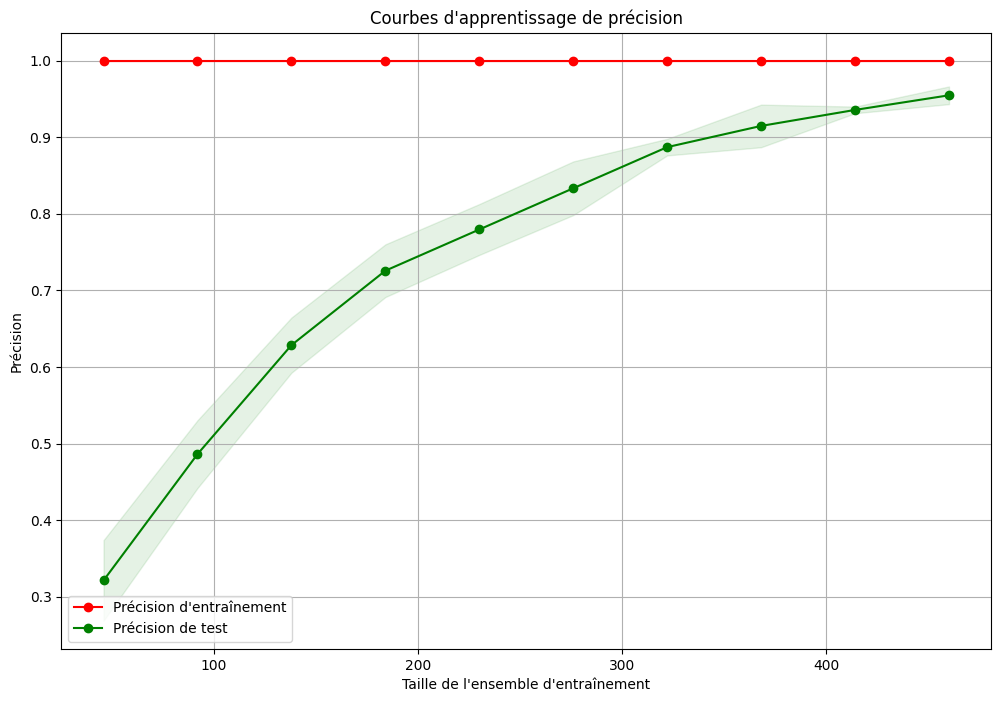

In [11]:
evaluation_ab = Evaluation(adaboost_model.ab_classifier, adaboost_model.x_test, adaboost_model.y_test,adaboost_model.x_train,adaboost_model.y_train)
f1, precision, recall = evaluation_ab.calculate_metrics(adaboost_model.y_test, adaboost_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix()
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_fa.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_fa.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Reseaux de neurones


In [12]:
model_R_N = Reseaux_de_neurones(x_train, y_train, x_val, y_val, x_test, y_test)
model_R_N.preprocess_data()
model_R_N.validation_croisee_gridsearch()
model_R_N.entrainement()
model_R_N.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([17, 22, 66, 14, 59, 43, 95, 15, 25, 47, 47, 21, 40, 15, 92, 93, 59,
       95, 59, 29, 51, 94,  4,  9, 61, 14, 19, 17, 21, 47, 37, 40, 58, 25,
       75, 42, 22,  3, 21, 96, 86, 36,  5, 35, 31, 12,  2, 48, 51, 49, 35,
        2, 85, 52, 26,  8, 30,  5, 56, 87, 16, 83, 54, 83, 34, 78, 43,  8,
       59, 53, 16, 89, 97, 39, 11, 63,  0, 66, 82, 92,  0, 65, 78, 31, 84,
       25, 94, 18, 70, 39, 13, 67, 17, 93, 55, 24,  4, 70, 91, 65, 25, 84,
       27, 37, 34, 97, 32, 30, 24, 32, 31, 96, 19, 42, 58, 25, 50, 84, 29,
       30, 49, 51,  7, 19, 83, 36, 26, 21, 80, 52, 89, 85, 53, 48, 20, 70,
       14, 77, 33, 48,  6, 38, 95, 70, 80, 33, 71,  0, 37, 59, 30, 85, 91,
       55, 45, 81, 42, 31, 54,  6,  0, 93, 96, 60, 73, 86, 26, 62, 22,  9,
       12, 71, 37, 32,  5, 57,  9, 65, 66, 83, 45, 10, 92, 22, 13, 77, 87,
        6, 43, 79, 44, 97, 45])

F1 Score: 0.9730, Precision: 0.9820, Recall: 0.9741


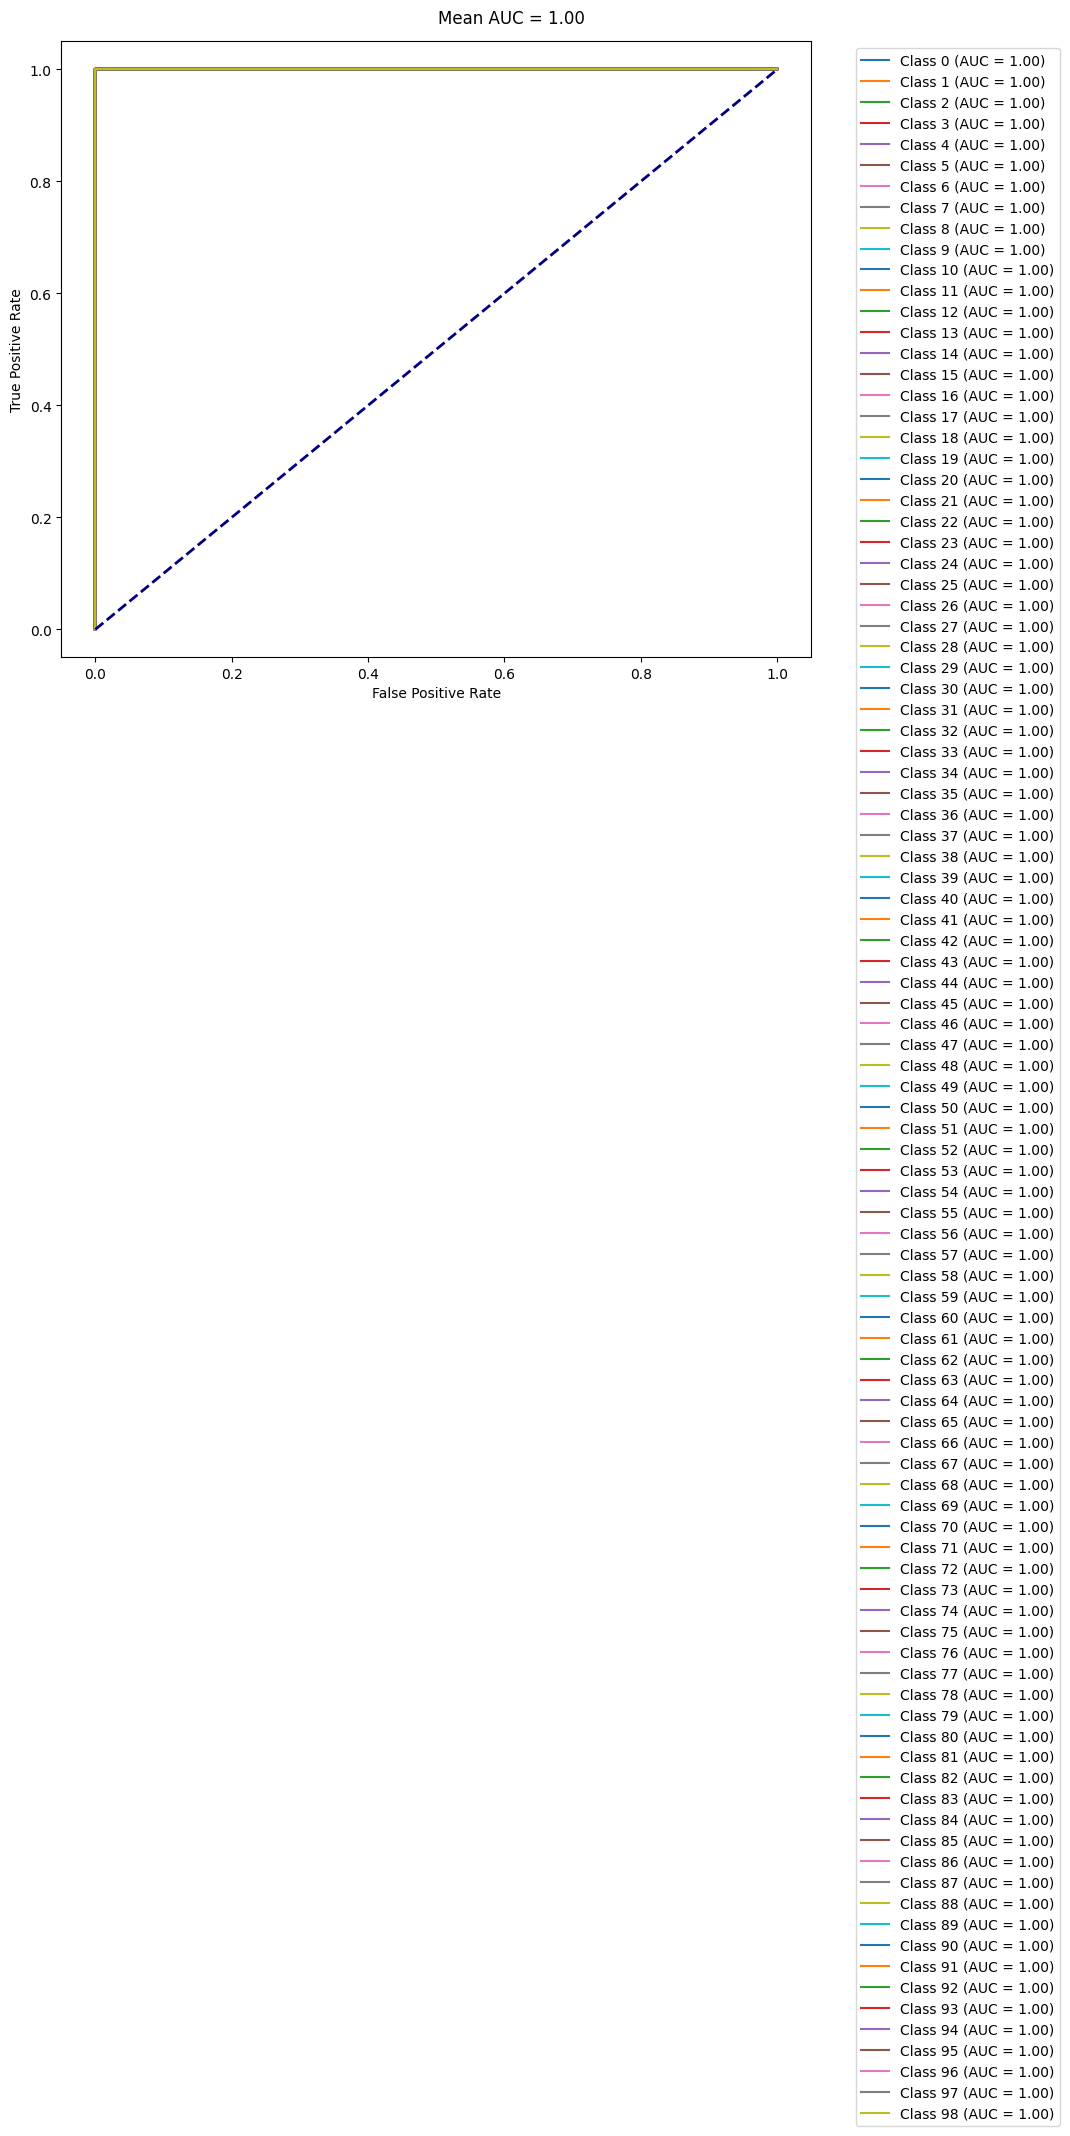

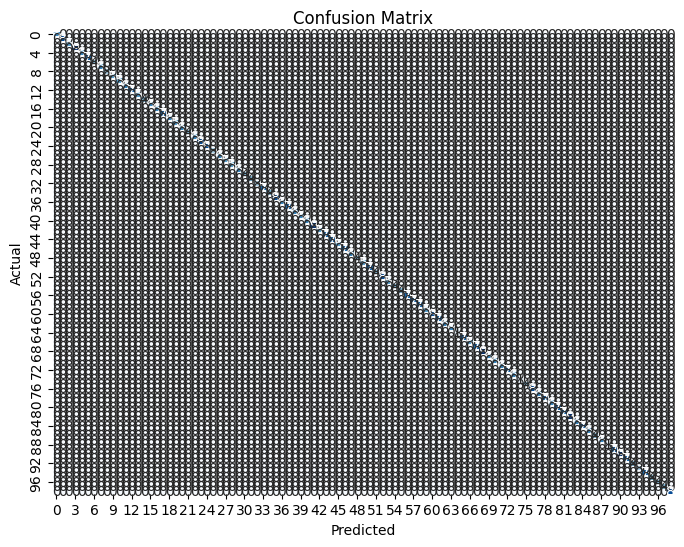

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

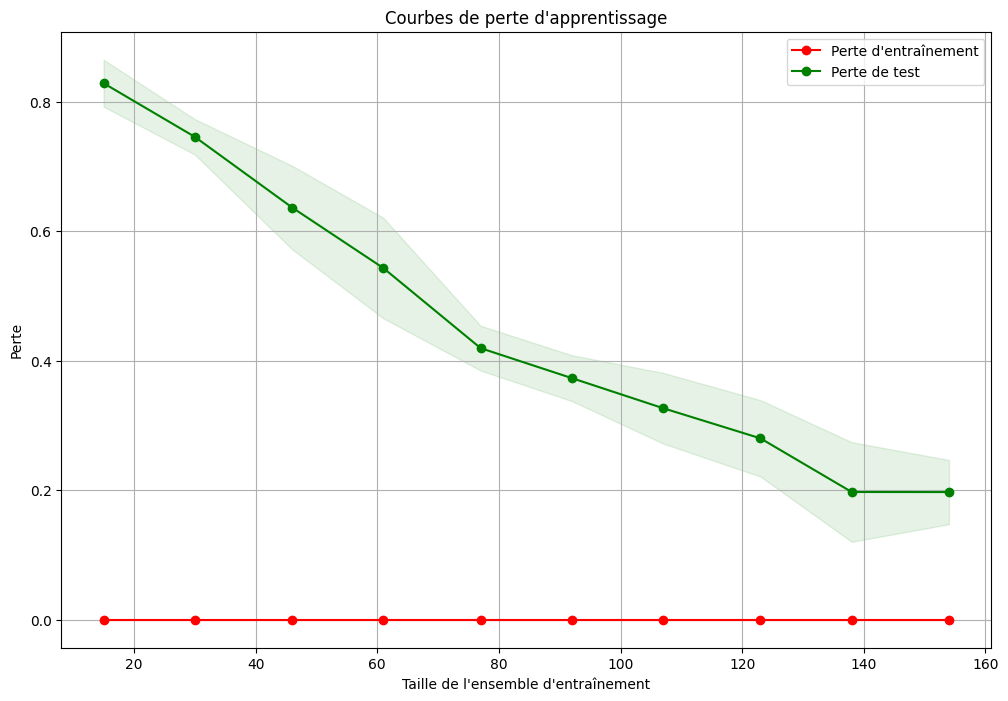

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

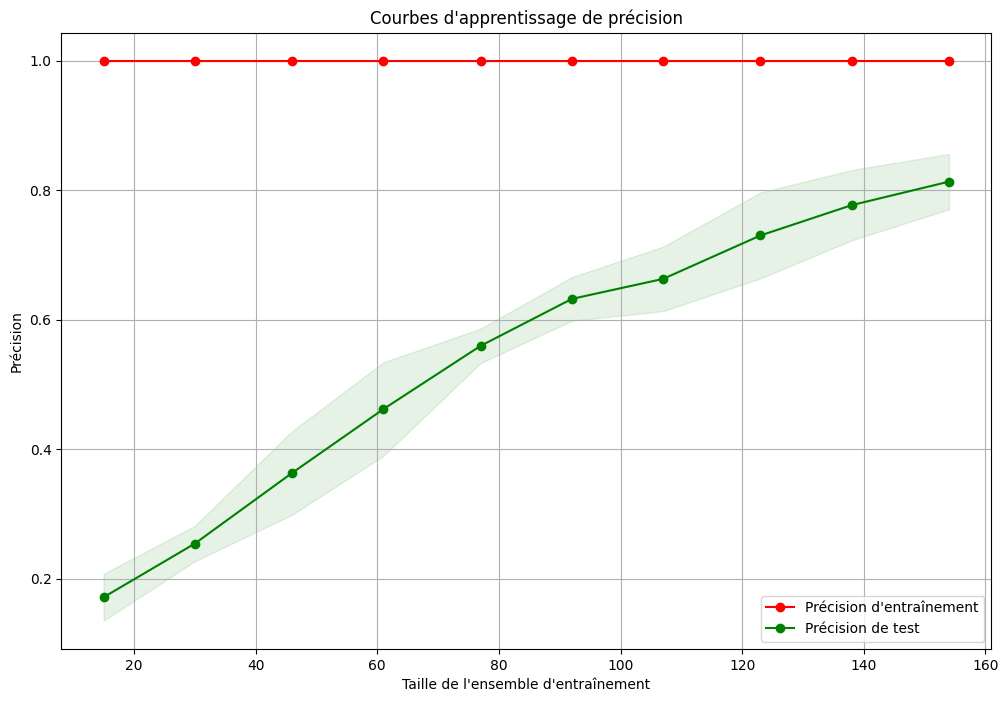

In [13]:
evaluation_rn = Evaluation(model_R_N.nn_classifier, model_R_N.x_test, model_R_N.y_test,model_R_N.x_train,model_R_N.y_train)
f1, precision, recall = evaluation_rn.calculate_metrics(model_R_N.y_test, model_R_N.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_rn.plt_roc_curve()
evaluation_rn.plt_confusion_matrix()
evaluation_rn.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_rn.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_rn.plot_learning_curves_accuracy(train_sizes=train_sizes)


In [14]:
print("Best hyperparameters:", model_R_N.best_hyperparameters)

Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01}


##### Bagging

In [15]:
bagging_classifier = Bagging(x_train, y_train, x_val, y_val, x_test, y_test)
bagging_classifier.validation_croisee_gridsearch()
bagging_classifier.entrainement()
predictions = bagging_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres pour Bagging: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres pour Bagging: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 200}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.2000, Precision: 0.2063, Recall: 0.2435


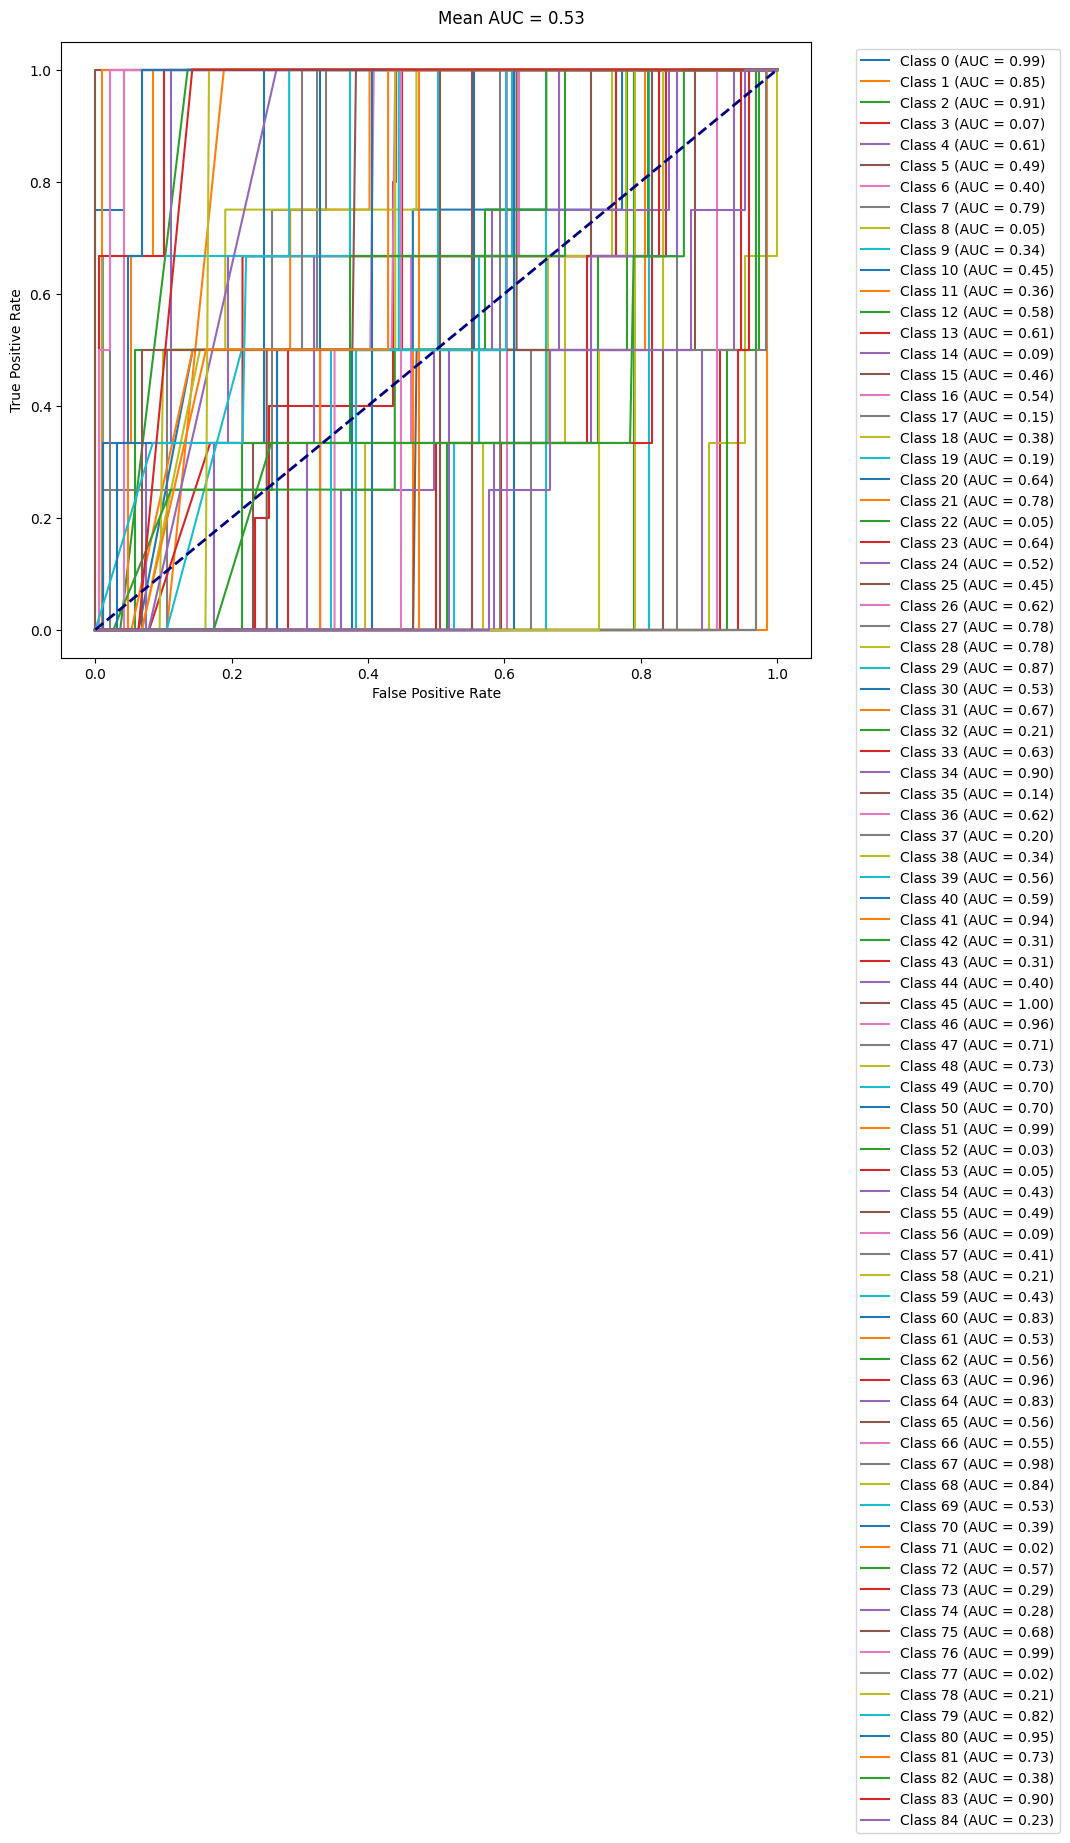

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.02      1.00      0.05         1
           4       1.00      1.00      1.00         2
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         3
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         

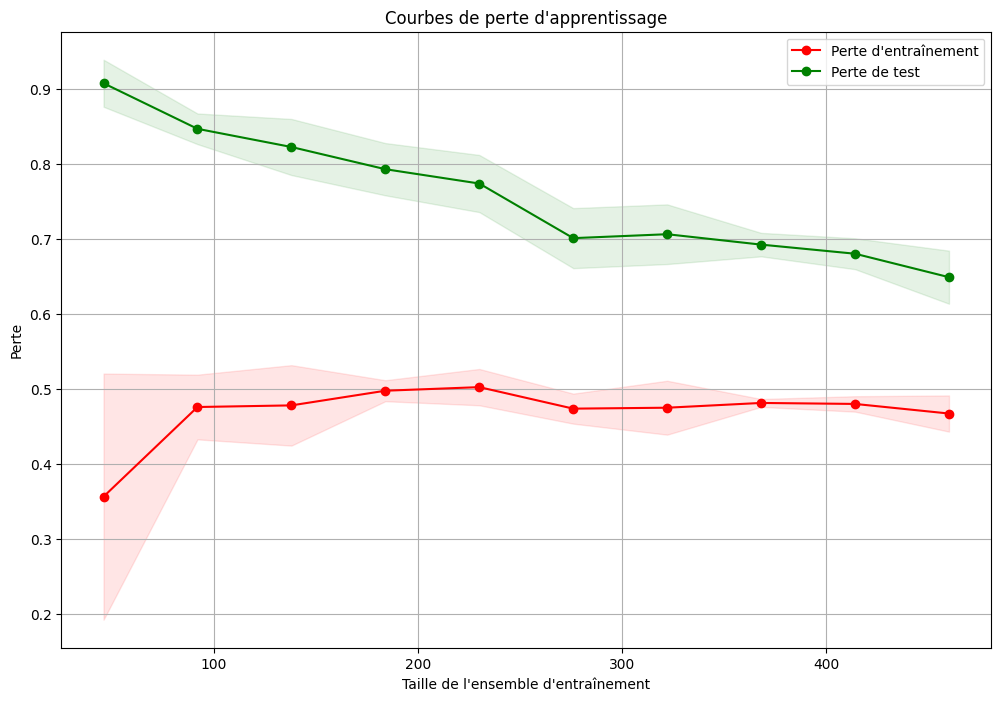

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


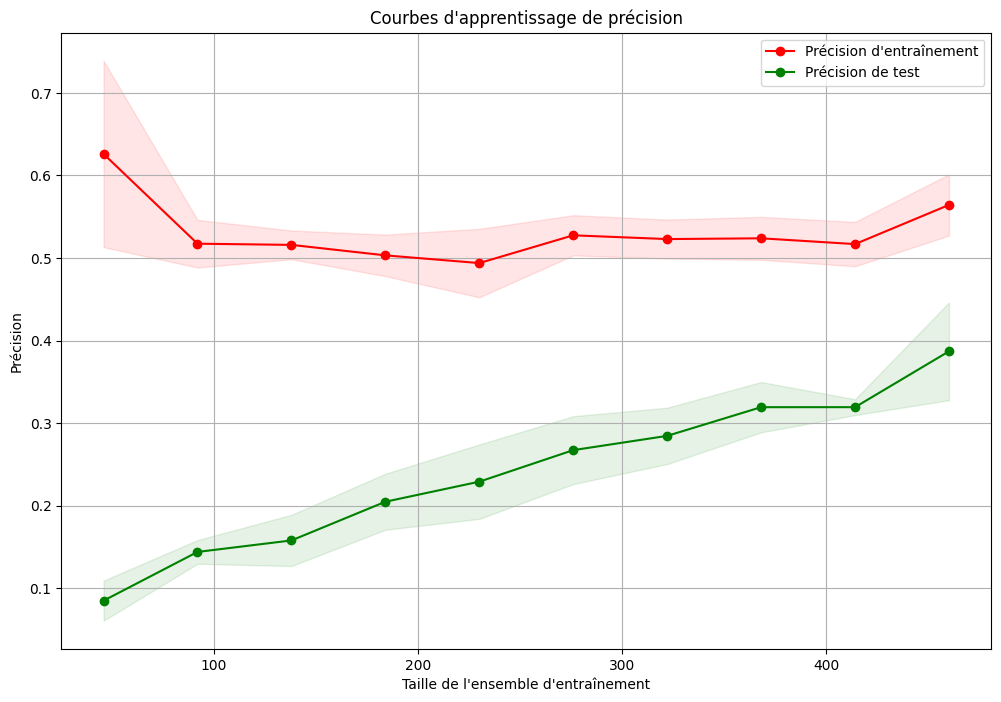

In [16]:
evaluation_bg = Evaluation(model=bagging_classifier.bg_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation_bg.calculate_metrics(bagging_classifier.y_test, bagging_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_bg.plt_roc_curve()
evaluation_bg.plt_confusion_matrix
evaluation_bg.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_bg.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_bg.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### KNN

In [17]:
KNN_classifier = Knn(x_train, y_train, x_val, y_val, x_test, y_test)
KNN_classifier.validation_croisee_gridsearch()
KNN_classifier.entrainement()
predictions = KNN_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


F1 Score: 0.7867, Precision: 0.8554, Recall: 0.7876


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


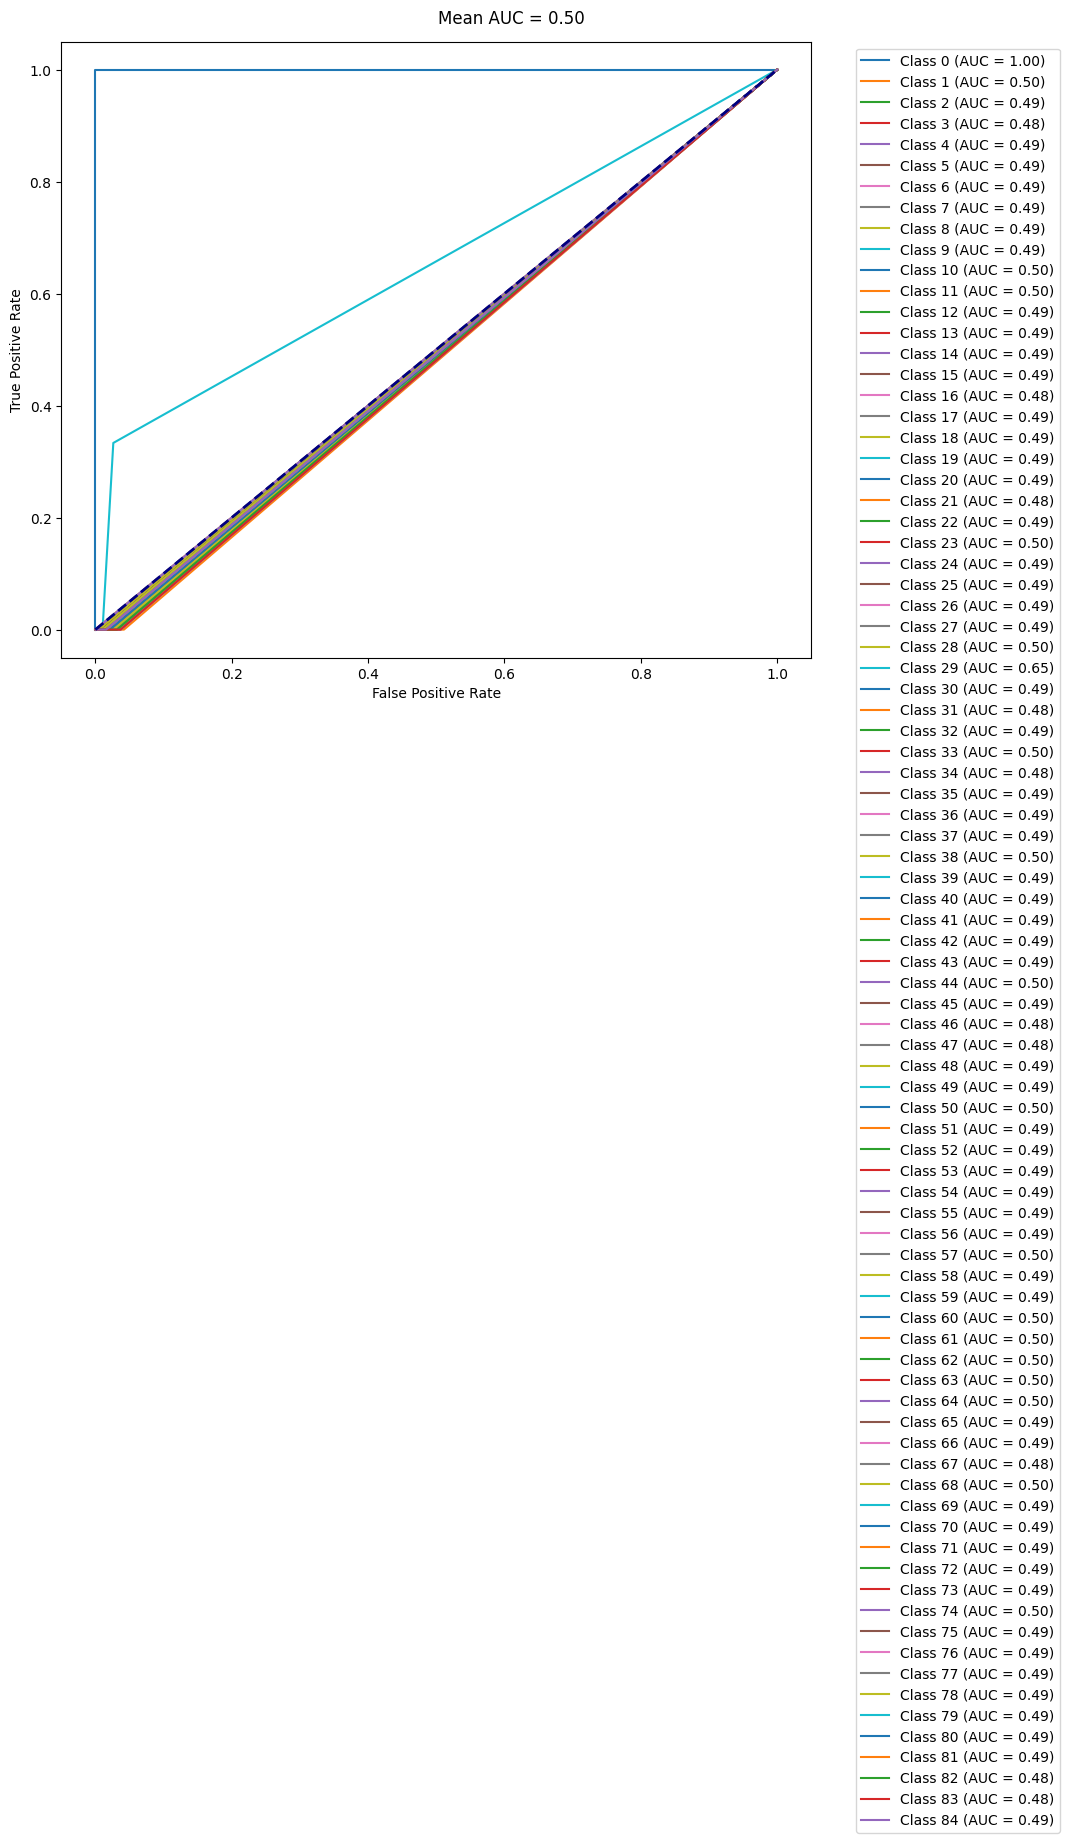

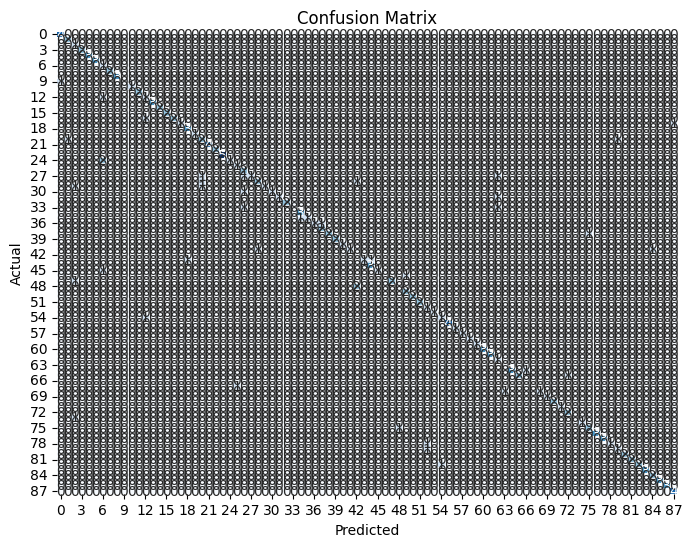

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         2
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.20      1.00      0.33         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.33      0.50      0.40         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      0.67      0.80         

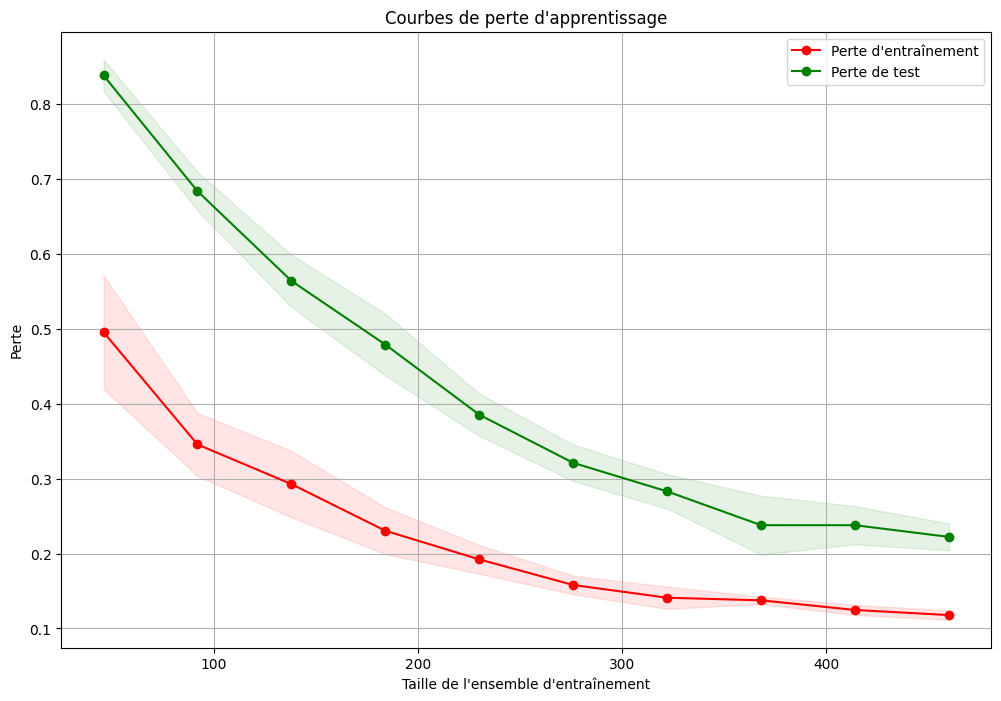

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


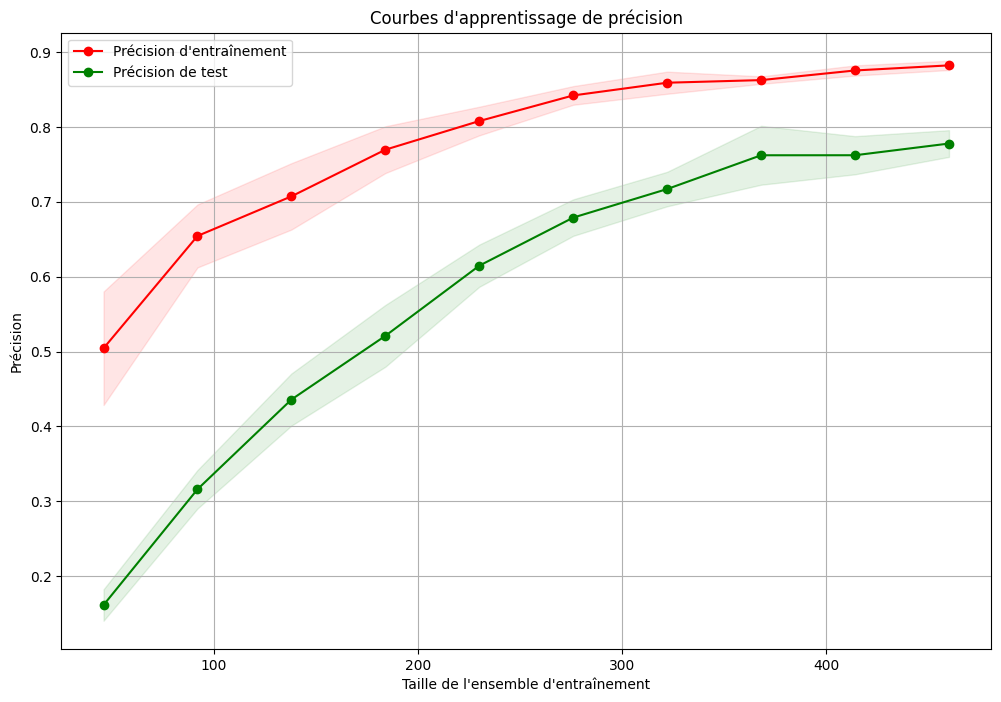

In [18]:
evaluation_knn = Evaluation(KNN_classifier.knn_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_knn.calculate_metrics(KNN_classifier.y_test, KNN_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_knn.plt_roc_curve()
evaluation_knn.plt_confusion_matrix()
evaluation_knn.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_knn.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_knn.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Perceptron

In [19]:
Perceptron_classifier = Perceptron_model(x_train, y_train, x_val, y_val, x_test, y_test)
Perceptron_classifier.validation_croisee_gridsearch()
Perceptron_classifier.entrainement()
predictions = Perceptron_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 1e-05}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 1e-05}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7174, Precision: 0.7534, Recall: 0.7513
Model does not support predict_proba method


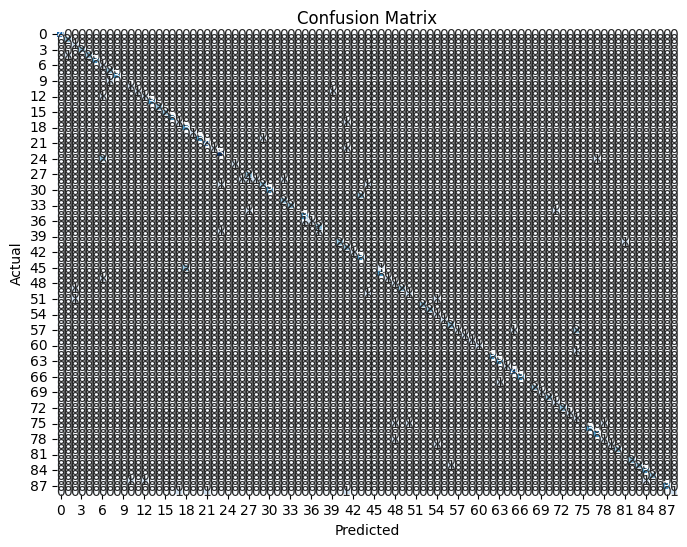

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       0.20      1.00      0.33         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         

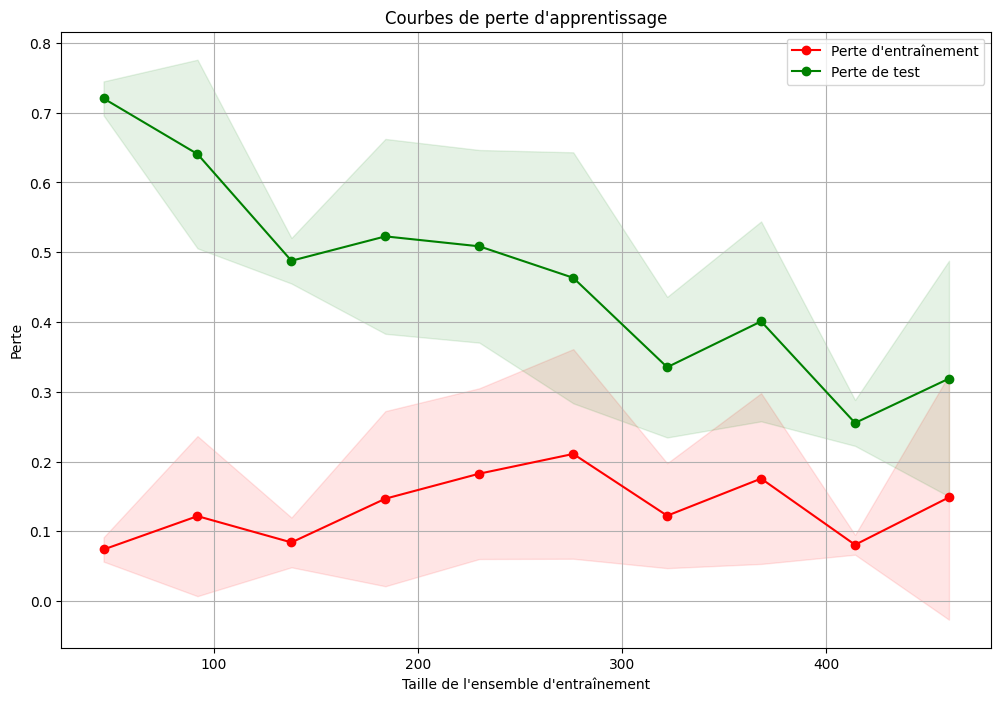

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


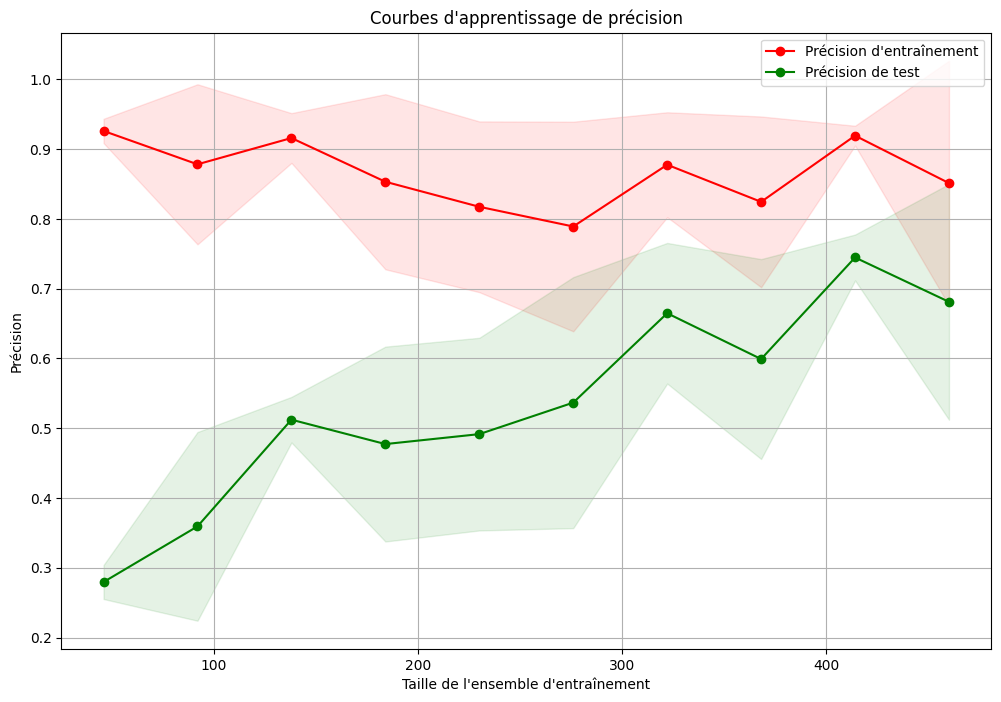

In [20]:
evaluation_P = Evaluation(Perceptron_classifier.perceptron_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_P.calculate_metrics(Perceptron_classifier.y_test, Perceptron_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_P.plt_roc_curve()
evaluation_P.plt_confusion_matrix()
evaluation_P.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_P.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_P.plot_learning_curves_accuracy(train_sizes=train_sizes)


##### Logistic regression

In [21]:
RL_classifier = LogisticRegression_model(x_train, y_train, x_val, y_val, x_test, y_test)
RL_classifier.validation_croisee_gridsearch()
RL_classifier.entrainement()
predictions = RL_classifier.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.6317, Precision: 0.6973, Recall: 0.6477


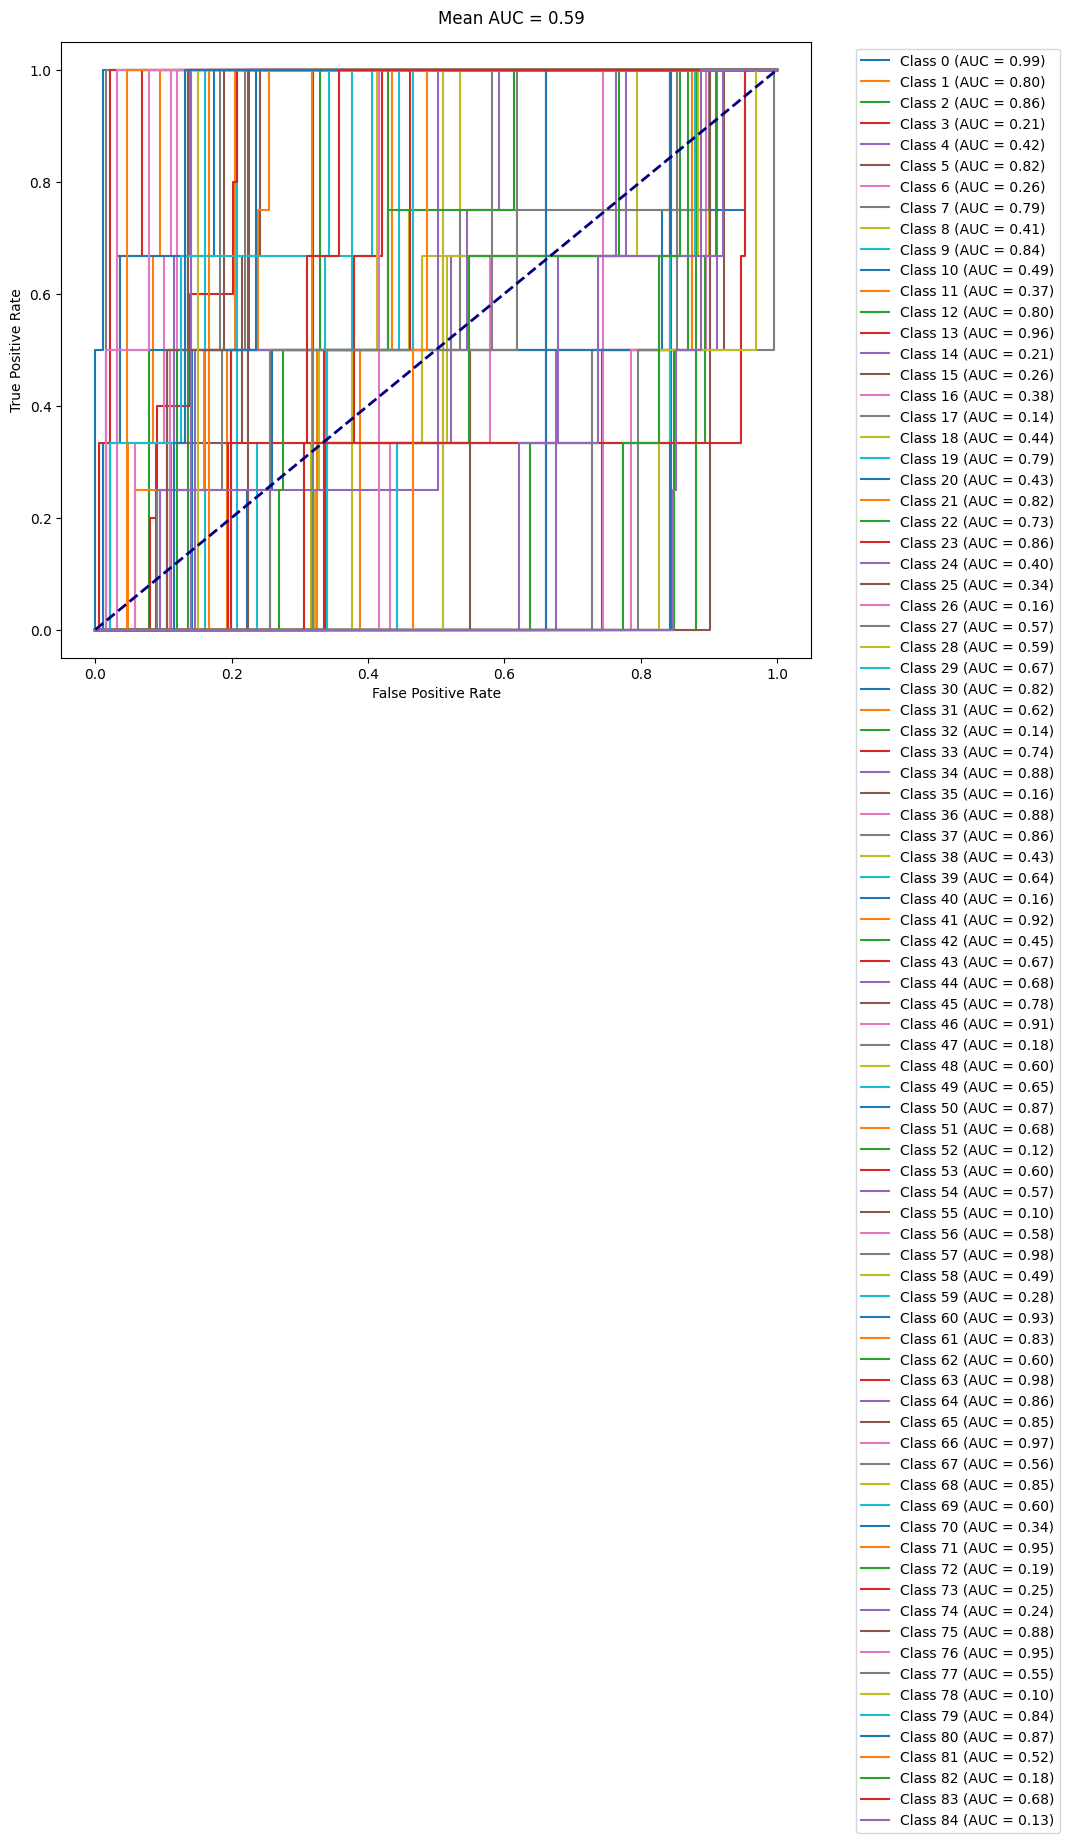

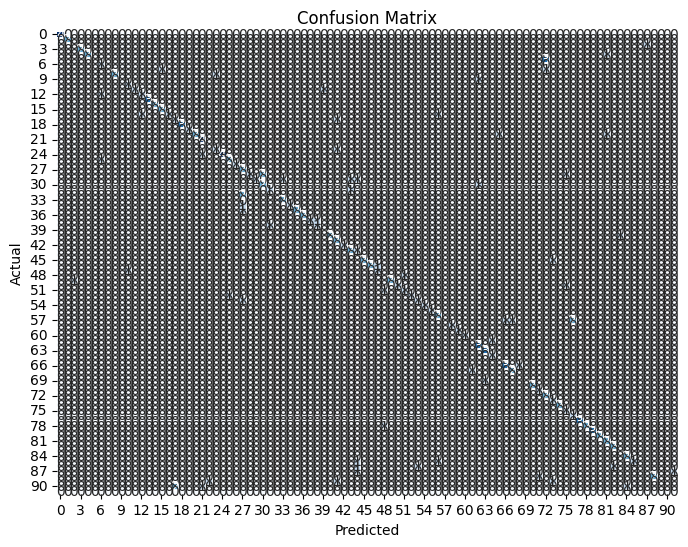

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.33      1.00      0.50         1
           8       0.00      0.00      0.00         2
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      0.33      0.50         

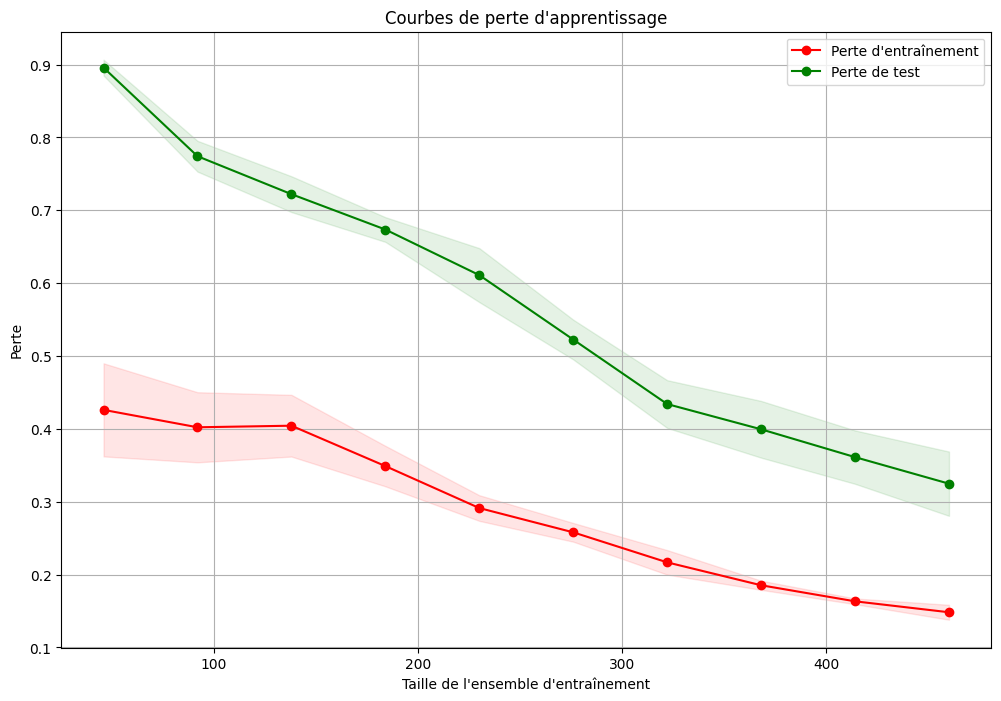

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


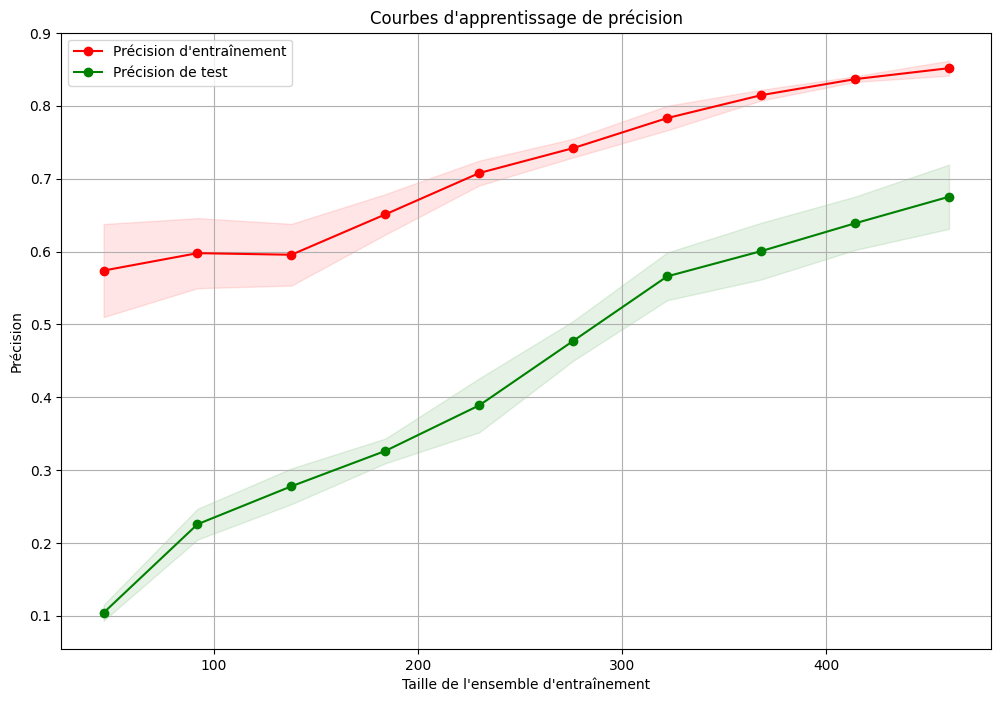

In [22]:
evaluation_RL = Evaluation(RL_classifier.logistic_regression_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_RL.calculate_metrics(RL_classifier.y_test, RL_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_RL.plt_roc_curve()
evaluation_RL.plt_confusion_matrix()
evaluation_RL.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_RL.plot_learning_curves_loss(train_sizes=train_sizes)
evaluation_RL.plot_learning_curves_accuracy(train_sizes=train_sizes)


In [23]:
classifieurs = {'Foret aleatoire': model_foret_alea, 'SVM': svm_model, 'Arbre de decision': Arbre_de_decision_model, 'Adaboost': adaboost_model, 'Reseaux de neurone': model_R_N, 'Bagging': bagging_classifier, 'KNN': KNN_classifier,'Logistic regression': RL_classifier}

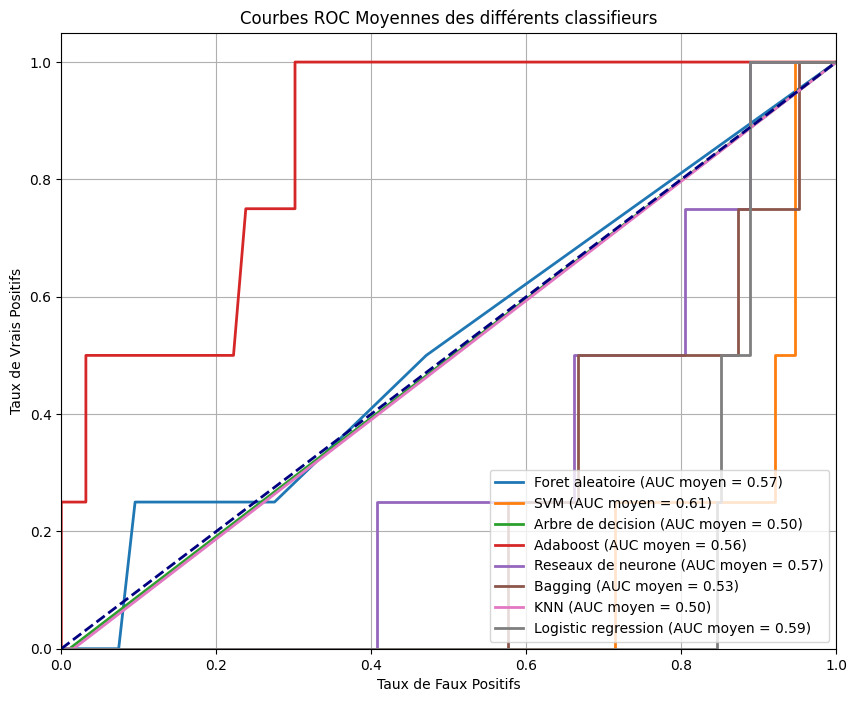

In [24]:
Evaluation.tracer_courbes_roc(classifieurs, y_test)